In [272]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import glob
import json
import requests
from io import StringIO
import numpy as np
import seaborn as sns
sns.set()

In [273]:
startDate = '2018-01-01T00:00:00Z'
endDate = '2023-04-01T00:00:00Z'
var = ('TI0_0,TI0_10,TI0_20,TI0_30,TI0_40,TI0_50,TI0_100,'
       'TI0_210,TI0_400,TI0_800,TI0_1300,TA0_0')
url = 'https://api.npolar.no/weather/troll/'
parameters = {
    'q': '',
    'format': 'json',
    'filter-station_id': 'kldata/nationalnr=92100/type=504',
    'filter-measured': startDate+'..'+endDate,
    'fields': 'measured,'+var,
    'limit': '144000',
    'start': '0'
}

r = requests.get(url, params=parameters)
data = pd.read_json(r.text,orient='records')
d = pd.DataFrame(data['feed']['entries'])
d.measured = pd.to_datetime(d.measured)
d.rename(columns={'measured': 'Time of Day (UTC)'}, inplace=True)
d = d.set_index('Time of Day (UTC)')
while data['feed']['list']['next']:
    r = requests.get(data['feed']['list']['next'])
    data = pd.read_json(r.text,orient='records')
    d1 = pd.DataFrame(data['feed']['entries'])
    d1.measured = pd.to_datetime(d1.measured)
    d1 = d1.set_index('measured')
    d = pd.concat([d, d1], sort=False)
d[d==-99.9] = np.nan

taf = d.sort_index()
taf.rename(columns={'TI0_0':'T0', 'TI0_10':'T10', 'TI0_20':'T20', 'TI0_30':'T30',
                    'TI0_40':'T40', 'TI0_50':'T50', 'TI0_100':'T100', 'TI0_210':'T210',
                    'TI0_400':'T400', 'TI0_800':'T800', 'TI0_1300':'T1300',
                    'TA0_0':'T'},
           inplace=True)
taf.info()
taf.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2303334 entries, 2018-09-14 08:13:00+00:00 to 2023-03-31 23:59:00+00:00
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   T210    float64
 1   T100    float64
 2   T10     float64
 3   T20     float64
 4   T30     float64
 5   T1300   float64
 6   T40     float64
 7   T800    float64
 8   T       float64
 9   T50     float64
 10  T400    float64
 11  T0      float64
dtypes: float64(12)
memory usage: 228.4 MB


T210  T100  T10  T20  T30  T1300  T40  T800     T  \
2018-09-14 08:13:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN -31.0   
2018-09-14 08:14:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN -31.1   
2018-09-14 08:15:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN -31.2   
2018-09-14 08:16:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN -31.3   
2018-09-14 08:17:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN -31.4   

                           T50  T400  T0  
2018-09-14 08:13:00+00:00  NaN   NaN NaN  
2018-09-14 08:14:00+00:00  NaN   NaN NaN  
2018-09-14 08:15:00+00:00  NaN   NaN NaN  
2018-09-14 08:16:00+00:00  NaN   NaN NaN  
2018-09-14 08:17:00+00:00  NaN   NaN NaN

(-40.0, 10.0)

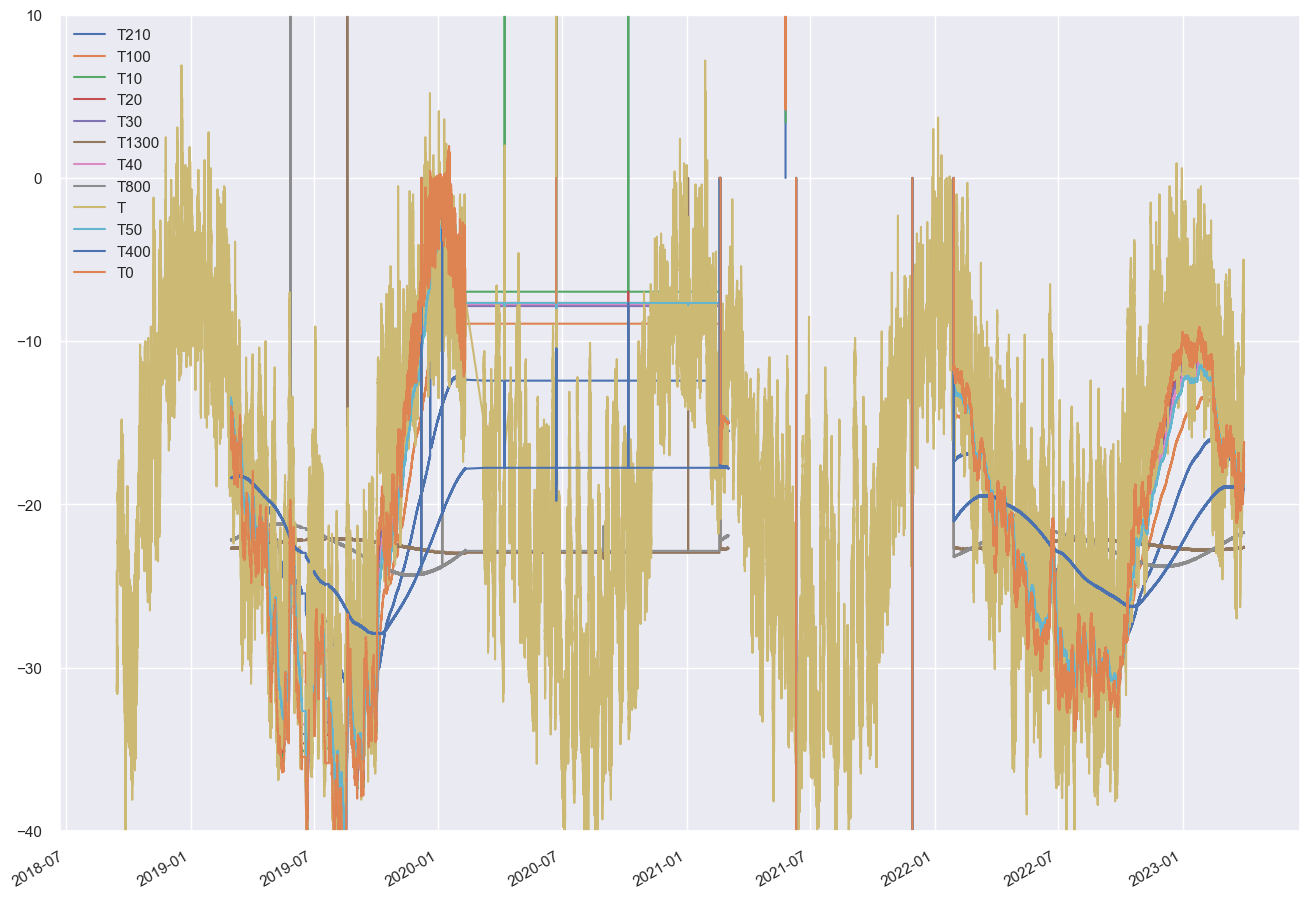

In [275]:
ax = taf.plot(figsize=(16,12))
ax.set_ylim(-40,10)

(-40.0, 10.0)

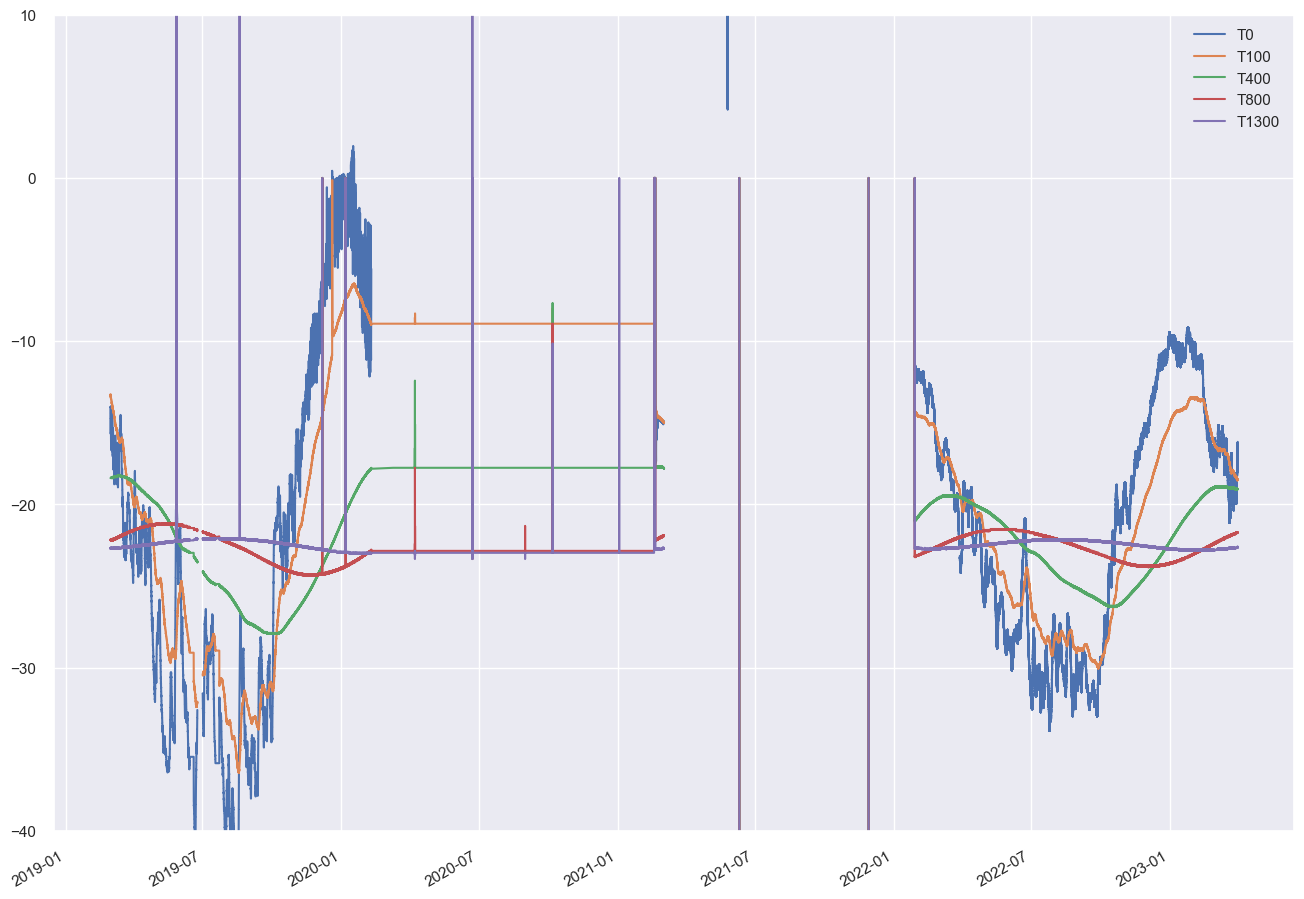

In [276]:
ax = taf.loc[:, ['T0', 'T100', 'T400', 'T800', 'T1300']].plot(figsize=(16,12))
ax.set_ylim(-40,10)

(-10.0, 15.0)

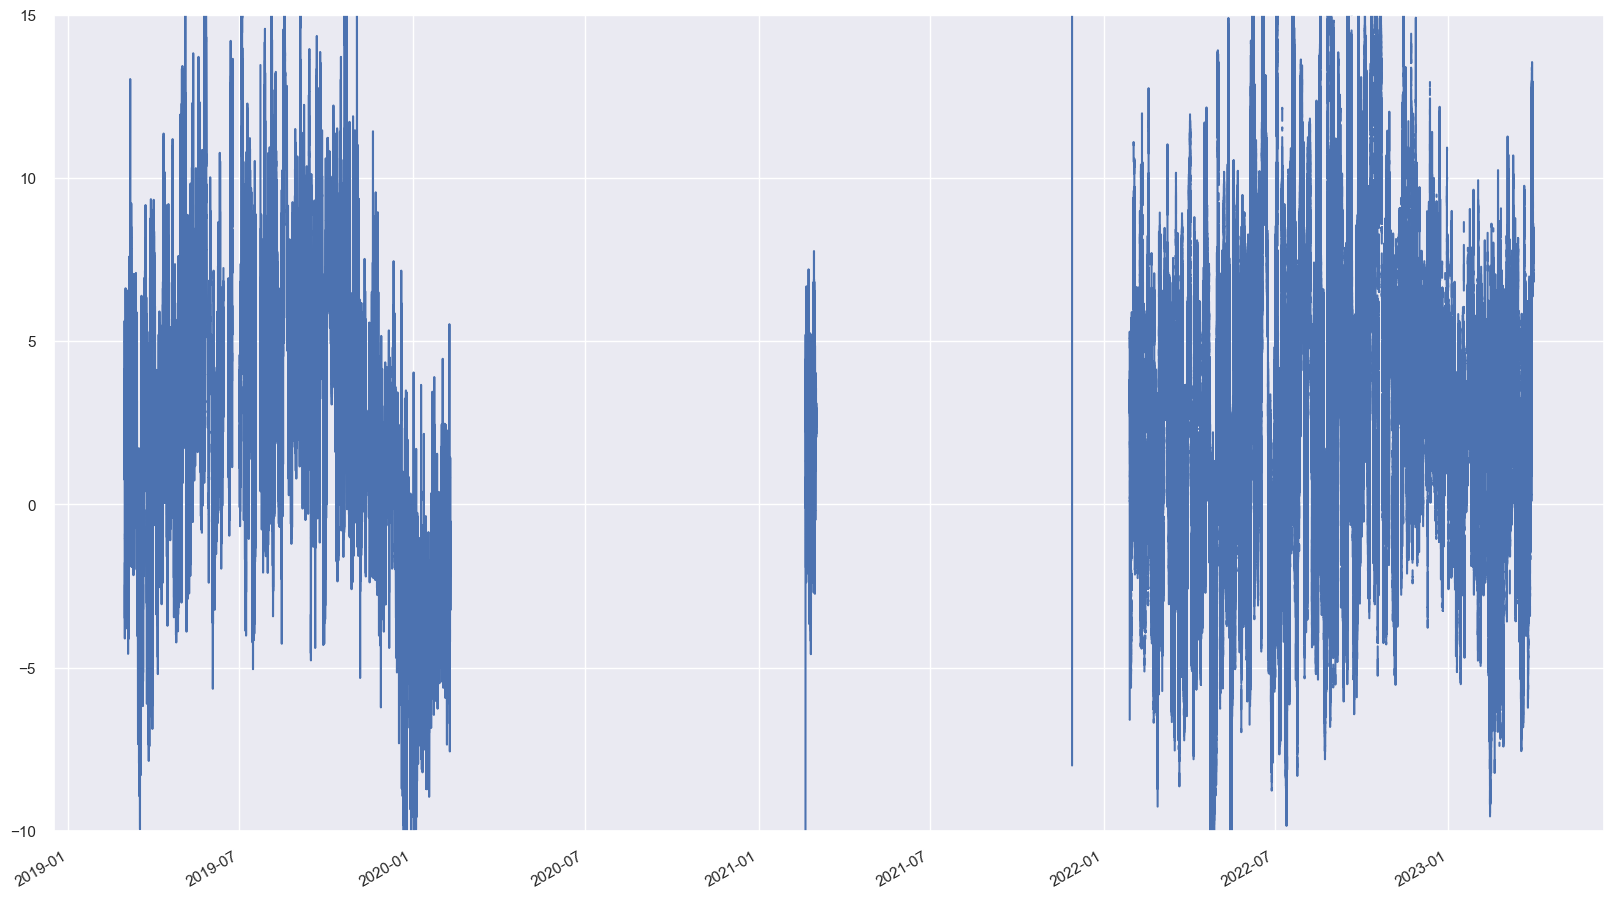

In [277]:
ax = (taf.loc[:,'T']-taf.loc[:,'T0']).plot(figsize=(20,12))
ax.set_ylim(-10,15)

In [278]:
taf.loc['2023-02-02'].index[range(0,1440,15)]

DatetimeIndex(['2023-02-02 00:00:00+00:00', '2023-02-02 00:15:00+00:00',
               '2023-02-02 00:30:00+00:00', '2023-02-02 00:45:00+00:00',
               '2023-02-02 01:00:00+00:00', '2023-02-02 01:15:00+00:00',
               '2023-02-02 01:30:00+00:00', '2023-02-02 01:45:00+00:00',
               '2023-02-02 02:00:00+00:00', '2023-02-02 02:15:00+00:00',
               '2023-02-02 02:30:00+00:00', '2023-02-02 02:45:00+00:00',
               '2023-02-02 03:00:00+00:00', '2023-02-02 03:15:00+00:00',
               '2023-02-02 03:30:00+00:00', '2023-02-02 03:45:00+00:00',
               '2023-02-02 04:00:00+00:00', '2023-02-02 04:15:00+00:00',
               '2023-02-02 04:30:00+00:00', '2023-02-02 04:45:00+00:00',
               '2023-02-02 05:00:00+00:00', '2023-02-02 05:15:00+00:00',
               '2023-02-02 05:30:00+00:00', '2023-02-02 05:45:00+00:00',
               '2023-02-02 06:00:00+00:00', '2023-02-02 06:15:00+00:00',
               '2023-02-02 06:30:00+00:00', '2023-0

In [279]:
TimeOfYear = ['O2', 'N1', 'N2', 'D1', 'D2', 'J1', 'J2', 'F1']
Variable = ['T', 'T0', 'T10', 'T20', 'T30', 'T40', 'T50']
Stat = ['min', '10%', '25%', 'med', 'mean', '75%', '90%', 'max', 'std']
df1920 = pd.DataFrame(columns=pd.MultiIndex.from_product([TimeOfYear, Variable, Stat], names=['Time of year', 'Variable', 'Statistic']), index=taf.loc['2023-01-01'].index[range(0,1440,15)], dtype='float')
df1920

Time of year               O2                                       ...  F1  \
Variable                    T                                   T0  ... T40   
Statistic                 min 10% 25% med mean 75% 90% max std min  ... std   
2023-01-01 00:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 00:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 00:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 00:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 01:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
...                        ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..   
2023-01-01 22:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   

Time of year                                                    
Variable                  T50                                   
Statistic                 min 10% 25% med mean 75% 90% max std  
2023-01-01 00:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 00:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 00:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 00:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 01:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
...                        ..  ..  ..  ..  ...  ..  ..  ..  ..  
2023-01-01 22:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  

[96 rows x 504 columns]

(-10.0, 15.0)

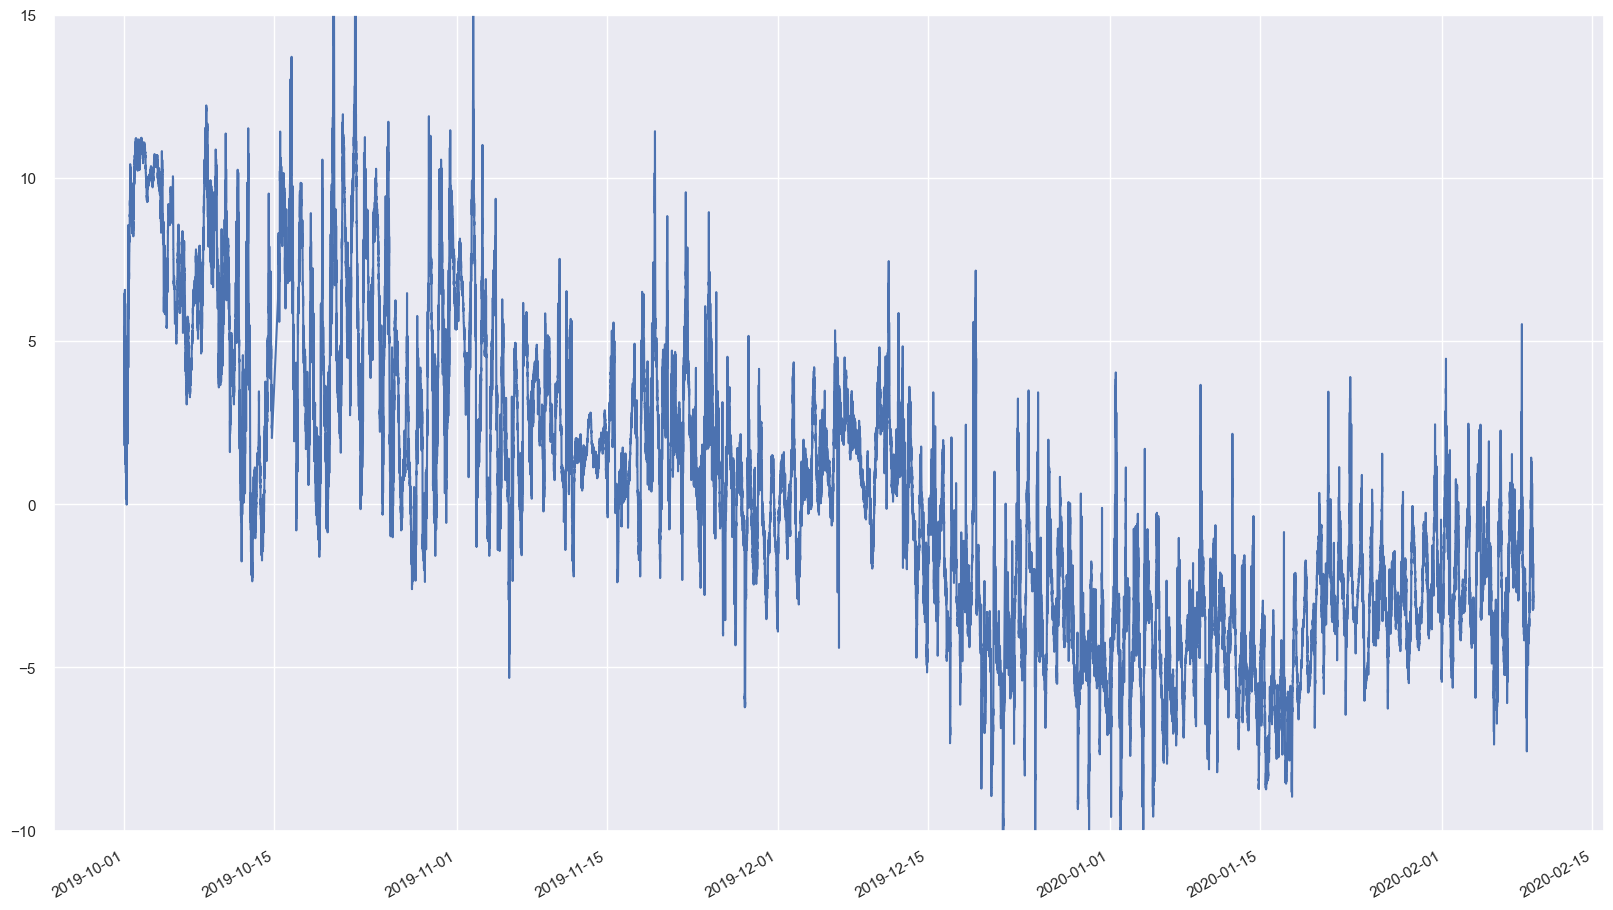

In [280]:
ax = (taf.loc['2019-10':'2020-03','T']-taf.loc['2019-10':'2020-03','T0']).plot(figsize=(20,12))
ax.set_ylim(-10,15)

In [286]:
times = pd.DataFrame(index=TimeOfYear, data={'start': pd.to_datetime(['2019-10-16', '2019-11-01', '2019-11-16', '2019-12-01',
                                                       '2019-12-16', '2020-01-01', '2020-01-16', '2020-02-01'], utc=True) - pd.Timedelta(minutes=7.5),
                                             'end': pd.to_datetime(['2019-10-30', '2019-11-15', '2019-11-30', '2019-12-15',
                                                     '2019-12-30', '2020-01-15', '2020-01-30', '2020-02-15'], utc=True) + pd.Timedelta(minutes=1447.5)})
for toy in TimeOfYear:
    tmp = taf.loc[times.loc[toy, 'start']:times.loc[toy, 'end'], :]
    for tod in df1920.index:
        tmp1 = tmp.between_time((tod-pd.Timedelta(minutes=7.5)).strftime('%H:%M:%S'), (tod+pd.Timedelta(minutes=7.5)).strftime('%H:%M:%S'))
        for s in Stat:
            if s=='min':
                tmp2 = tmp1.min()
            elif s=='10%':
                tmp2 = tmp1.quantile(0.1)
            elif s=='25%':
                tmp2 = tmp1.quantile(0.25)
            elif s=='med':
                tmp2 = tmp1.quantile(0.5)
            elif s=='mean':
                tmp2 = tmp1.mean()
            elif s=='75%':
                tmp2 = tmp1.quantile(0.75)
            elif s=='90%':
                tmp2 = tmp1.quantile(0.9)
            elif s=='max':
                tmp2 = tmp1.max()
            elif s=='std':
                tmp2 = tmp1.std()
            for v in Variable:
                df1920.loc[tod, (toy, v, s)] = tmp2.loc[v]

titles = ['Late October', 'Early November', 'Late November', 'Early December', 'Late December', 'Early January', 'Late January', 'Early February']

In [287]:
df1920

Time of year                 O2                                               \
Variable                      T                                                
Statistic                   min    10%   25%   med       mean     75%    90%   
2023-01-01 00:00:00+00:00 -23.3 -21.90 -20.6 -18.9 -18.738750 -16.375 -15.39   
2023-01-01 00:15:00+00:00 -23.2 -21.86 -20.8 -18.8 -18.722667 -15.800 -15.14   
2023-01-01 00:30:00+00:00 -22.5 -21.62 -20.3 -18.7 -18.687556 -16.300 -15.70   
2023-01-01 00:45:00+00:00 -22.1 -21.10 -20.6 -19.3 -18.787111 -16.400 -15.90   
2023-01-01 01:00:00+00:00 -23.6 -21.50 -20.7 -19.8 -19.160000 -18.200 -15.74   
...                         ...    ...   ...   ...        ...     ...    ...   
2023-01-01 22:45:00+00:00 -22.3 -21.26 -20.4 -18.7 -18.476444 -16.900 -15.80   
2023-01-01 23:00:00+00:00 -23.6 -22.36 -20.9 -18.6 -18.577778 -16.200 -15.30   
2023-01-01 23:15:00+00:00 -23.9 -22.40 -21.0 -18.5 -18.653333 -16.800 -15.84   
2023-01-01 23:30:00+00:00 -23.7 -21.60 -20.8 -18.9 -18.632000 -16.600 -16.04   
2023-01-01 23:45:00+00:00 -23.7 -21.90 -20.6 -18.9 -18.639111 -16.900 -15.30   

Time of year                                      ...        F1              \
Variable                                      T0  ...       T40   T50         
Statistic                   max       std    min  ...       std   min   10%   
2023-01-01 00:00:00+00:00 -14.3  2.405650 -23.35  ...  0.517874 -7.35 -7.28   
2023-01-01 00:15:00+00:00 -14.3  2.440959 -23.42  ...  0.517386 -7.35 -7.28   
2023-01-01 00:30:00+00:00 -14.1  2.246113 -23.48  ...  0.516543 -7.35 -7.28   
2023-01-01 00:45:00+00:00 -14.0  2.165509 -23.55  ...  0.516403 -7.35 -7.28   
2023-01-01 01:00:00+00:00 -13.7  2.293138 -23.61  ...  0.517822 -7.35 -7.35   
...                         ...       ...    ...  ...       ...   ...   ...   
2023-01-01 22:45:00+00:00 -14.8  2.004821 -22.97  ...  0.462143 -7.35 -7.28   
2023-01-01 23:00:00+00:00 -14.9  2.449899 -23.04  ...  0.461822 -7.35 -7.28   
2023-01-01 23:15:00+00:00 -14.7  2.515257 -23.10  ...  0.460593 -7.35 -7.28   
2023-01-01 23:30:00+00:00 -14.0  2.309365 -23.23  ...  0.456146 -7.35 -7.28   
2023-01-01 23:45:00+00:00 -13.8  2.467698 -23.29  ...  0.460888 -7.35 -7.28   

Time of year                                                            \
Variable                                                                 
Statistic                     25%   med      mean     75%    90%   max   
2023-01-01 00:00:00+00:00 -6.9700 -6.71 -6.621481 -6.2700 -5.950 -5.89   
2023-01-01 00:15:00+00:00 -6.9700 -6.71 -6.625852 -6.2700 -5.950 -5.89   
2023-01-01 00:30:00+00:00 -6.9700 -6.71 -6.631481 -6.2700 -5.950 -5.89   
2023-01-01 00:45:00+00:00 -6.9700 -6.71 -6.634370 -6.2700 -5.950 -5.89   
2023-01-01 01:00:00+00:00 -7.0000 -6.71 -6.642074 -6.2700 -5.950 -5.89   
...                           ...   ...       ...     ...    ...   ...   
2023-01-01 22:45:00+00:00 -7.0325 -6.71 -6.720000 -6.4575 -6.010 -5.95   
2023-01-01 23:00:00+00:00 -7.0325 -6.71 -6.716583 -6.4575 -6.010 -5.95   
2023-01-01 23:15:00+00:00 -7.0325 -6.71 -6.713000 -6.4575 -6.004 -5.95   
2023-01-01 23:30:00+00:00 -7.0325 -6.71 -6.711167 -6.4575 -6.010 -5.95   
2023-01-01 23:45:00+00:00 -7.0325 -6.71 -6.717667 -6.4575 -6.010 -5.95   

Time of year                         
Variable                             
Statistic                       std  
2023-01-01 00:00:00+00:00  0.479817  
2023-01-01 00:15:00+00:00  0.481120  
2023-01-01 00:30:00+00:00  0.479651  
2023-01-01 00:45:00+00:00  0.479416  
2023-01-01 01:00:00+00:00  0.480322  
...                             ...  
2023-01-01 22:45:00+00:00  0.425135  
2023-01-01 23:00:00+00:00  0.425691  
2023-01-01 23:15:00+00:00  0.433426  
2023-01-01 23:30:00+00:00  0.434601  
2023-01-01 23:45:00+00:00  0.432281  

[96 rows x 504 columns]

In [283]:
df1920.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2023-01-01 00:00:00+00:00 to 2023-01-01 23:45:00+00:00
Columns: 504 entries, ('O2', 'T', 'min') to ('F1', 'T50', 'std')
dtypes: float64(504)
memory usage: 380.8 KB


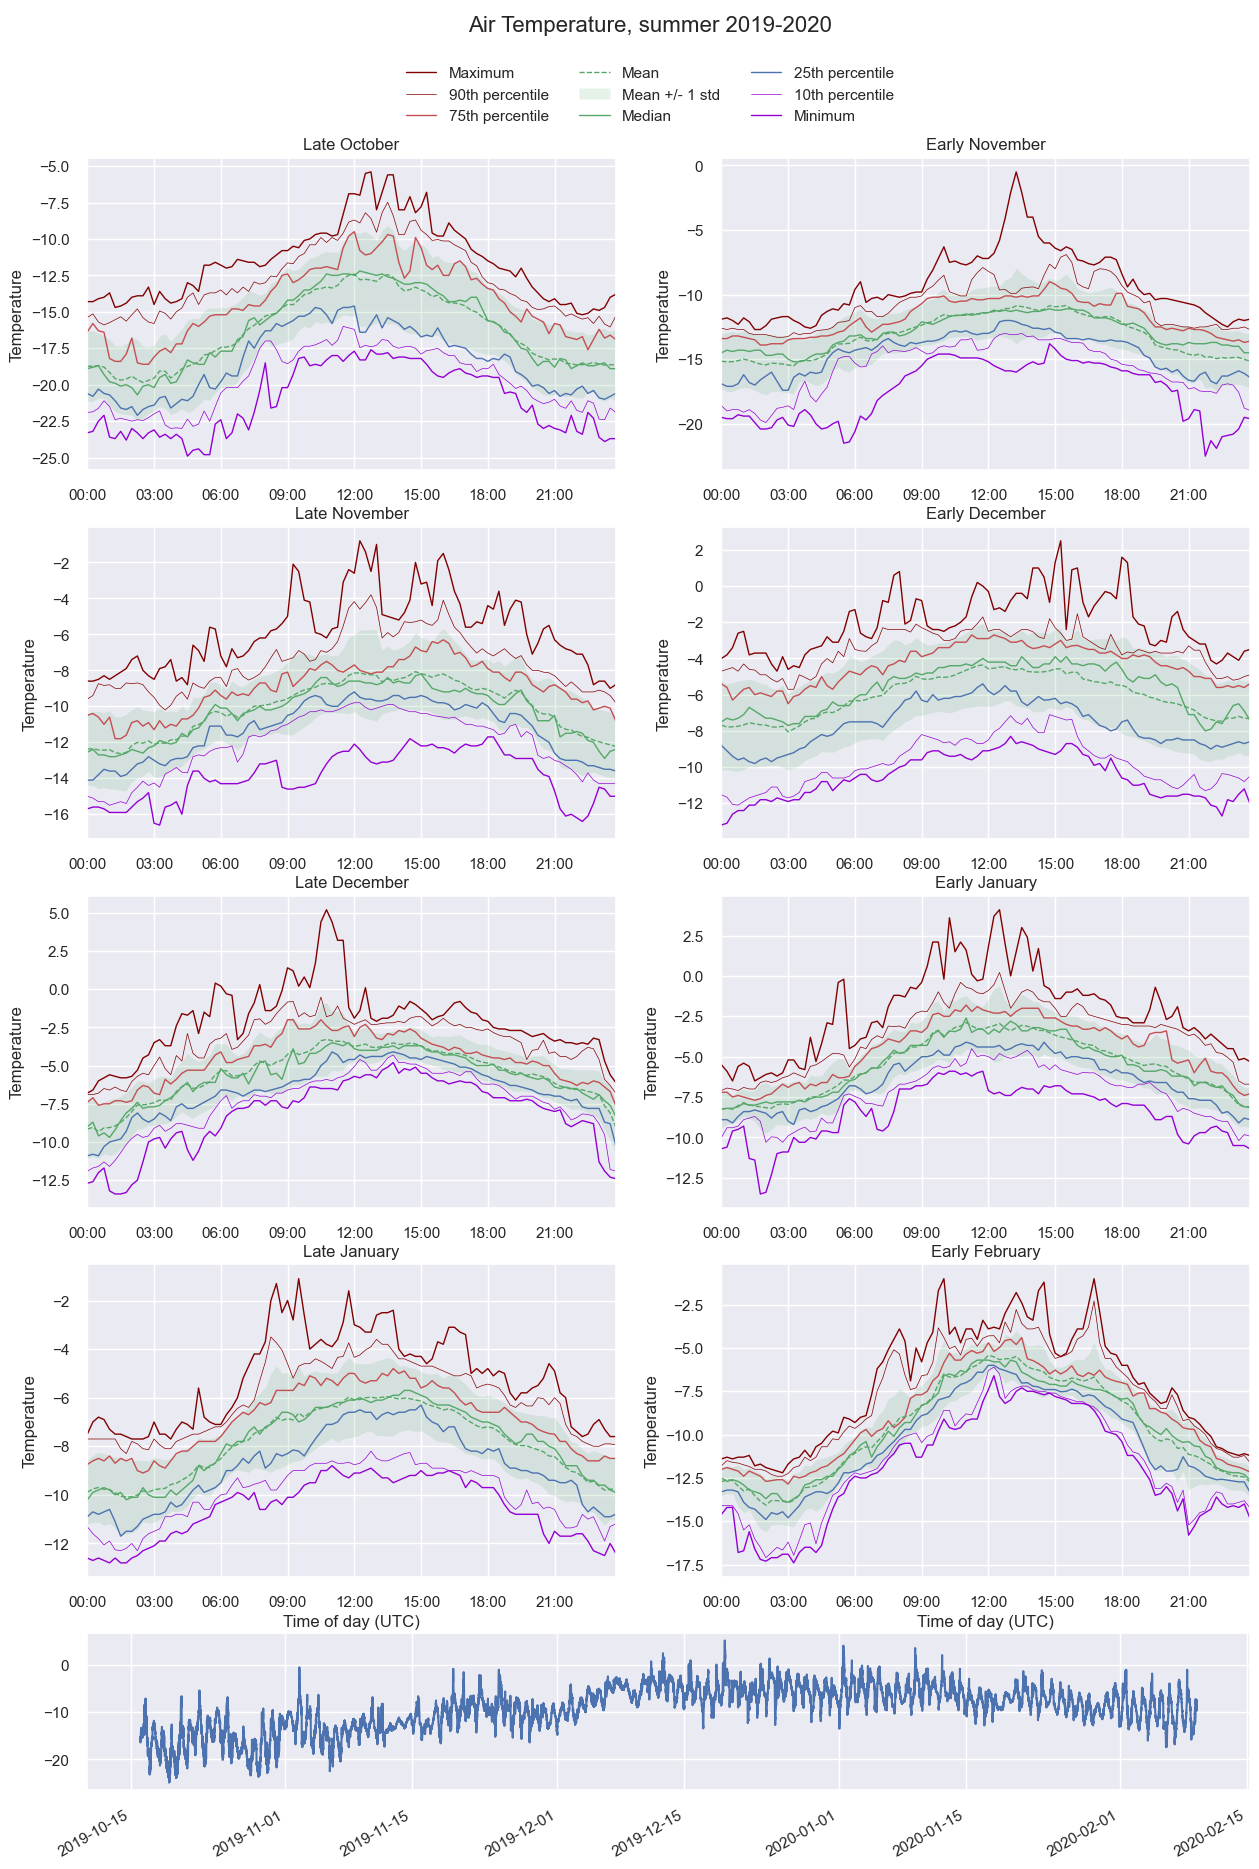

In [385]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df1920.loc[:, (TimeOfYear[a], 'T', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df1920.loc[:, (TimeOfYear[a], 'T', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df1920.index, df1920.loc[:, (TimeOfYear[a], 'T', 'mean')] - df1920.loc[:, (TimeOfYear[a], 'T', 'std')],
                                       df1920.loc[:, (TimeOfYear[a], 'T', 'mean')] + df1920.loc[:, (TimeOfYear[a], 'T', 'std')], facecolor='g', alpha=0.15)
    df1920.loc[:, (TimeOfYear[a], 'T', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df1920.index[::12])
    axs[chr(65+a)].set_xticklabels(df1920.index[::12].strftime('%H:%M'))
taf.loc['2019-10-16':'2020-02-15', 'T'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='Air Temperature, summer 2019-2020\n', title_fontsize=16);
fig.savefig('DiurnalAir19-20.png')

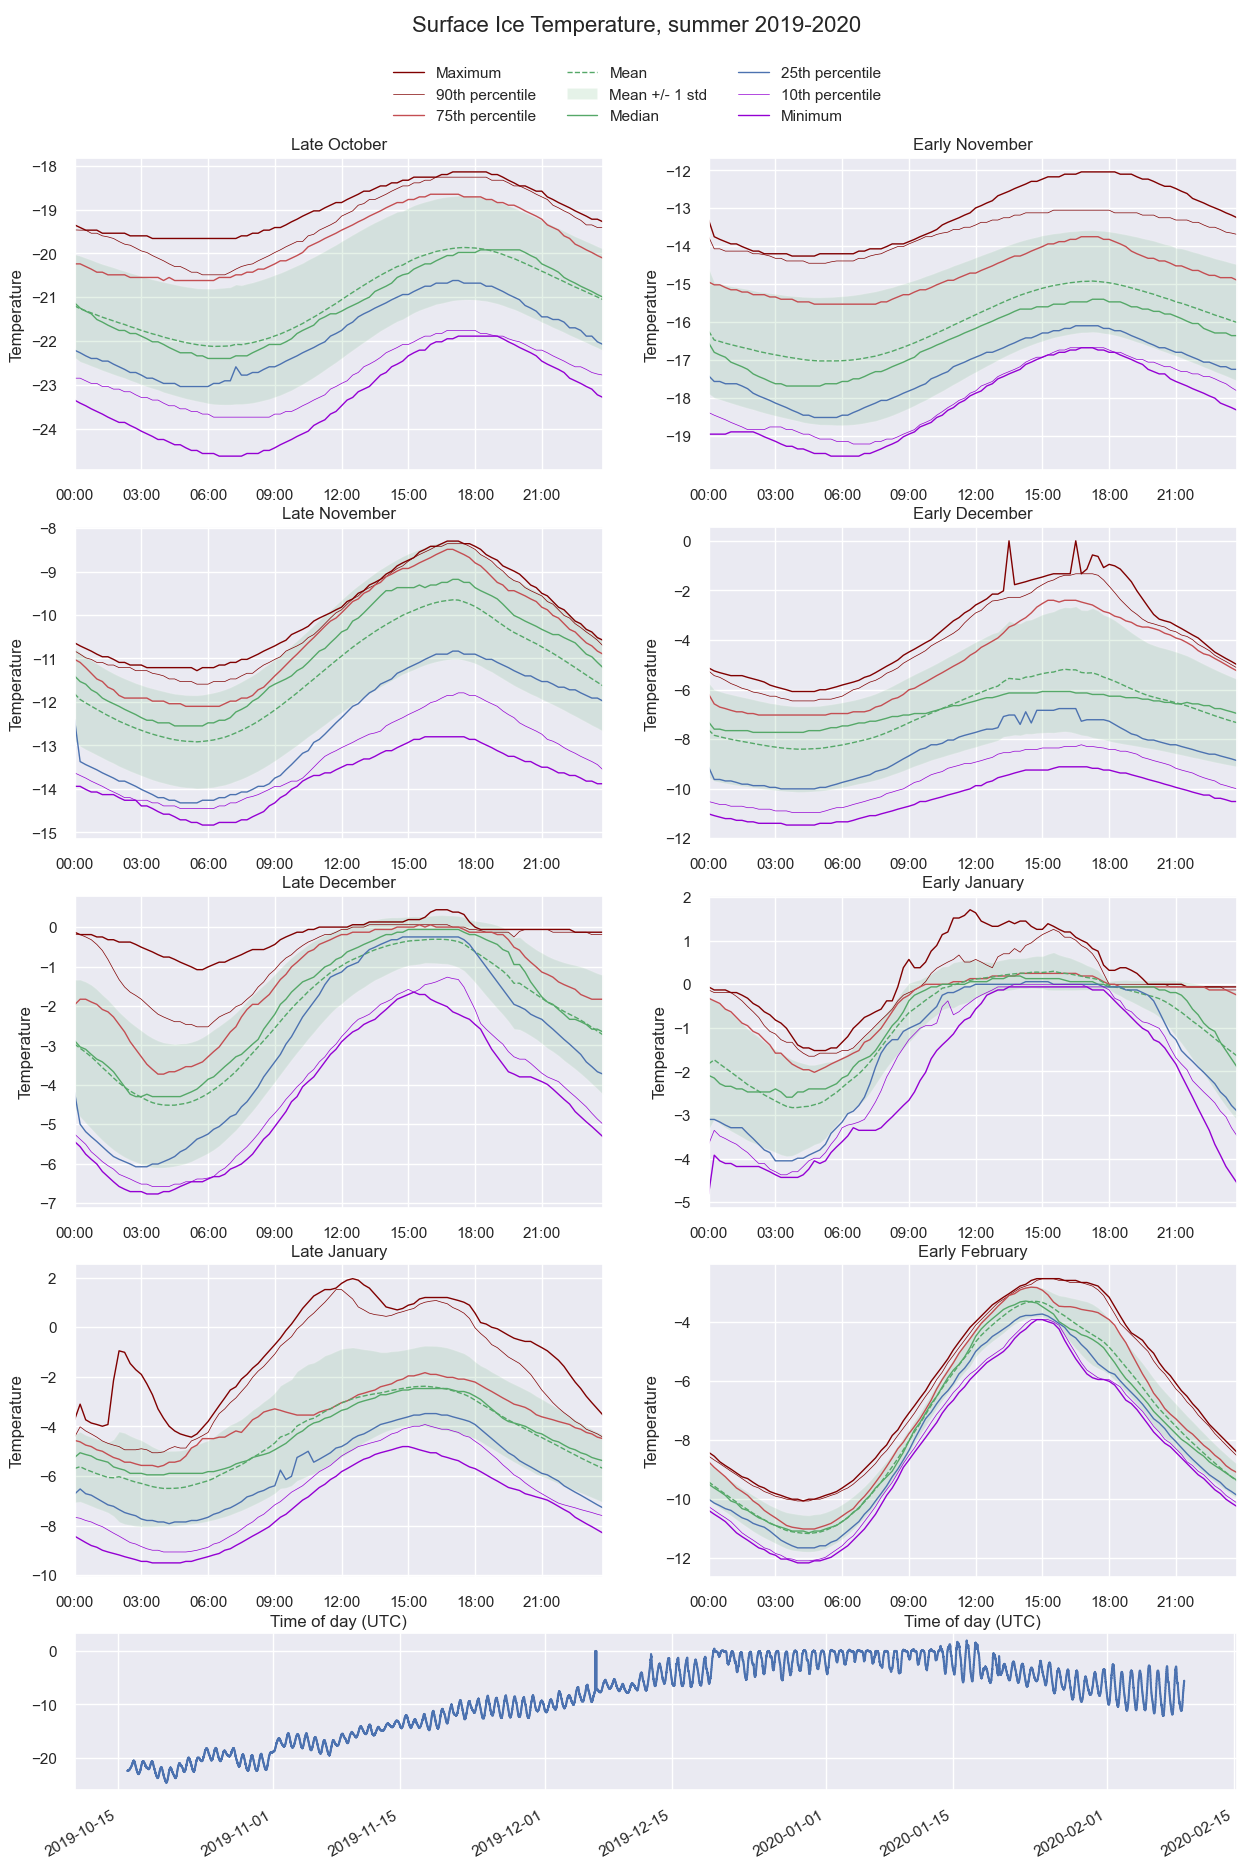

In [386]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df1920.loc[:, (TimeOfYear[a], 'T0', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df1920.loc[:, (TimeOfYear[a], 'T0', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df1920.index, df1920.loc[:, (TimeOfYear[a], 'T0', 'mean')] - df1920.loc[:, (TimeOfYear[a], 'T0', 'std')],
                                       df1920.loc[:, (TimeOfYear[a], 'T0', 'mean')] + df1920.loc[:, (TimeOfYear[a], 'T0', 'std')], facecolor='g', alpha=0.15)
    df1920.loc[:, (TimeOfYear[a], 'T0', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T0', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T0', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T0', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T0', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T0', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T0', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df1920.index[::12])
    axs[chr(65+a)].set_xticklabels(df1920.index[::12].strftime('%H:%M'))
taf.loc['2019-10-16':'2020-02-15', 'T0'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='Surface Ice Temperature, summer 2019-2020\n', title_fontsize=16);
fig.savefig('DiurnalSurface19-20.png')

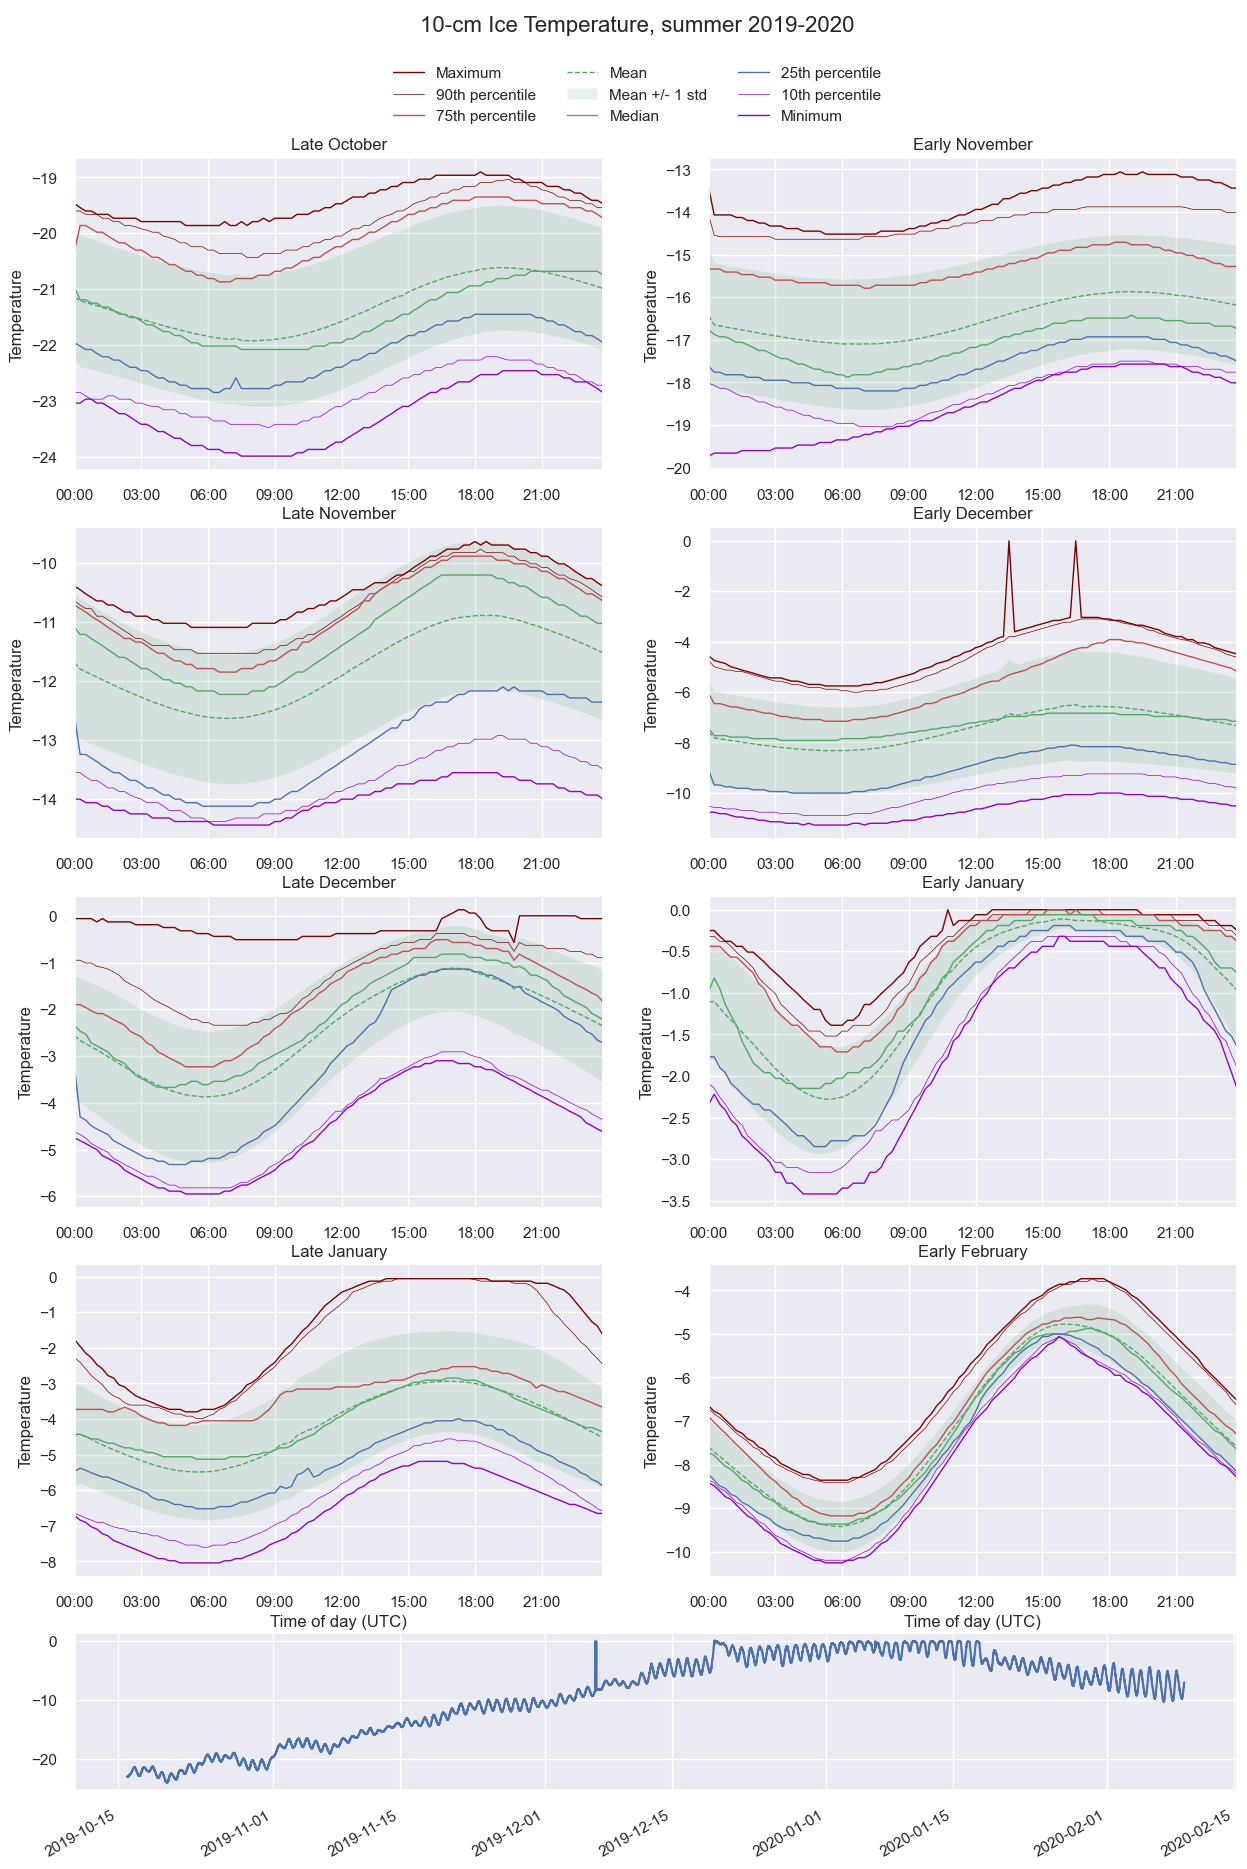

In [387]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df1920.loc[:, (TimeOfYear[a], 'T10', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df1920.loc[:, (TimeOfYear[a], 'T10', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df1920.index, df1920.loc[:, (TimeOfYear[a], 'T10', 'mean')] - df1920.loc[:, (TimeOfYear[a], 'T10', 'std')],
                                       df1920.loc[:, (TimeOfYear[a], 'T10', 'mean')] + df1920.loc[:, (TimeOfYear[a], 'T10', 'std')], facecolor='g', alpha=0.15)
    df1920.loc[:, (TimeOfYear[a], 'T10', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T10', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T10', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T10', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T10', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T10', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T10', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df1920.index[::12])
    axs[chr(65+a)].set_xticklabels(df1920.index[::12].strftime('%H:%M'))
taf.loc['2019-10-16':'2020-02-15', 'T10'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='10-cm Ice Temperature, summer 2019-2020\n', title_fontsize=16);
fig.savefig('Diurnal10cm19-20.png')

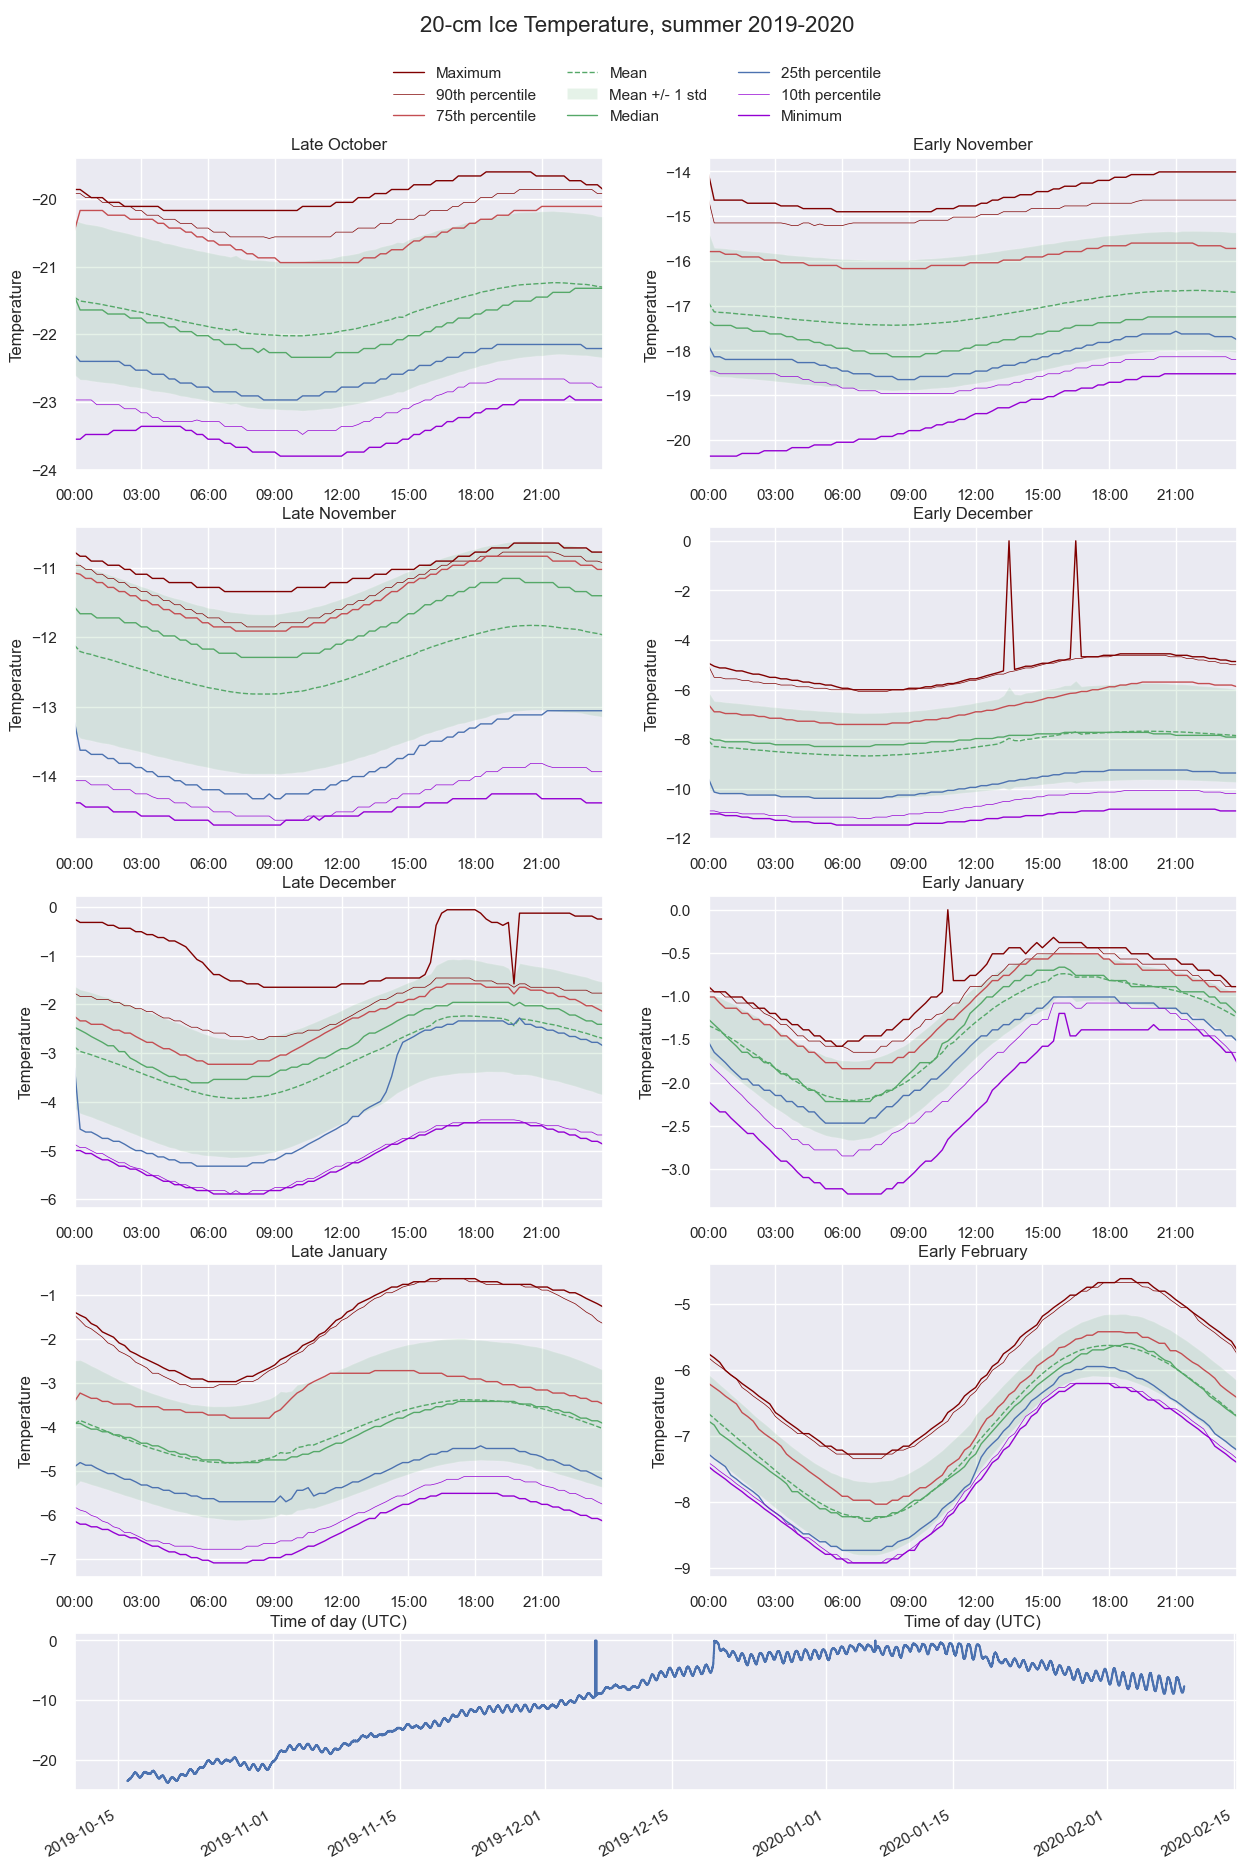

In [388]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df1920.loc[:, (TimeOfYear[a], 'T20', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df1920.loc[:, (TimeOfYear[a], 'T20', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df1920.index, df1920.loc[:, (TimeOfYear[a], 'T20', 'mean')] - df1920.loc[:, (TimeOfYear[a], 'T20', 'std')],
                                       df1920.loc[:, (TimeOfYear[a], 'T20', 'mean')] + df1920.loc[:, (TimeOfYear[a], 'T20', 'std')], facecolor='g', alpha=0.15)
    df1920.loc[:, (TimeOfYear[a], 'T20', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T20', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T20', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T20', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T20', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df1920.loc[:, (TimeOfYear[a], 'T20', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df1920.loc[:, (TimeOfYear[a], 'T20', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df1920.index[::12])
    axs[chr(65+a)].set_xticklabels(df1920.index[::12].strftime('%H:%M'))
taf.loc['2019-10-16':'2020-02-15', 'T20'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='20-cm Ice Temperature, summer 2019-2020\n', title_fontsize=16);
fig.savefig('Diurnal20cm19-20.png')

(-10.0, 15.0)

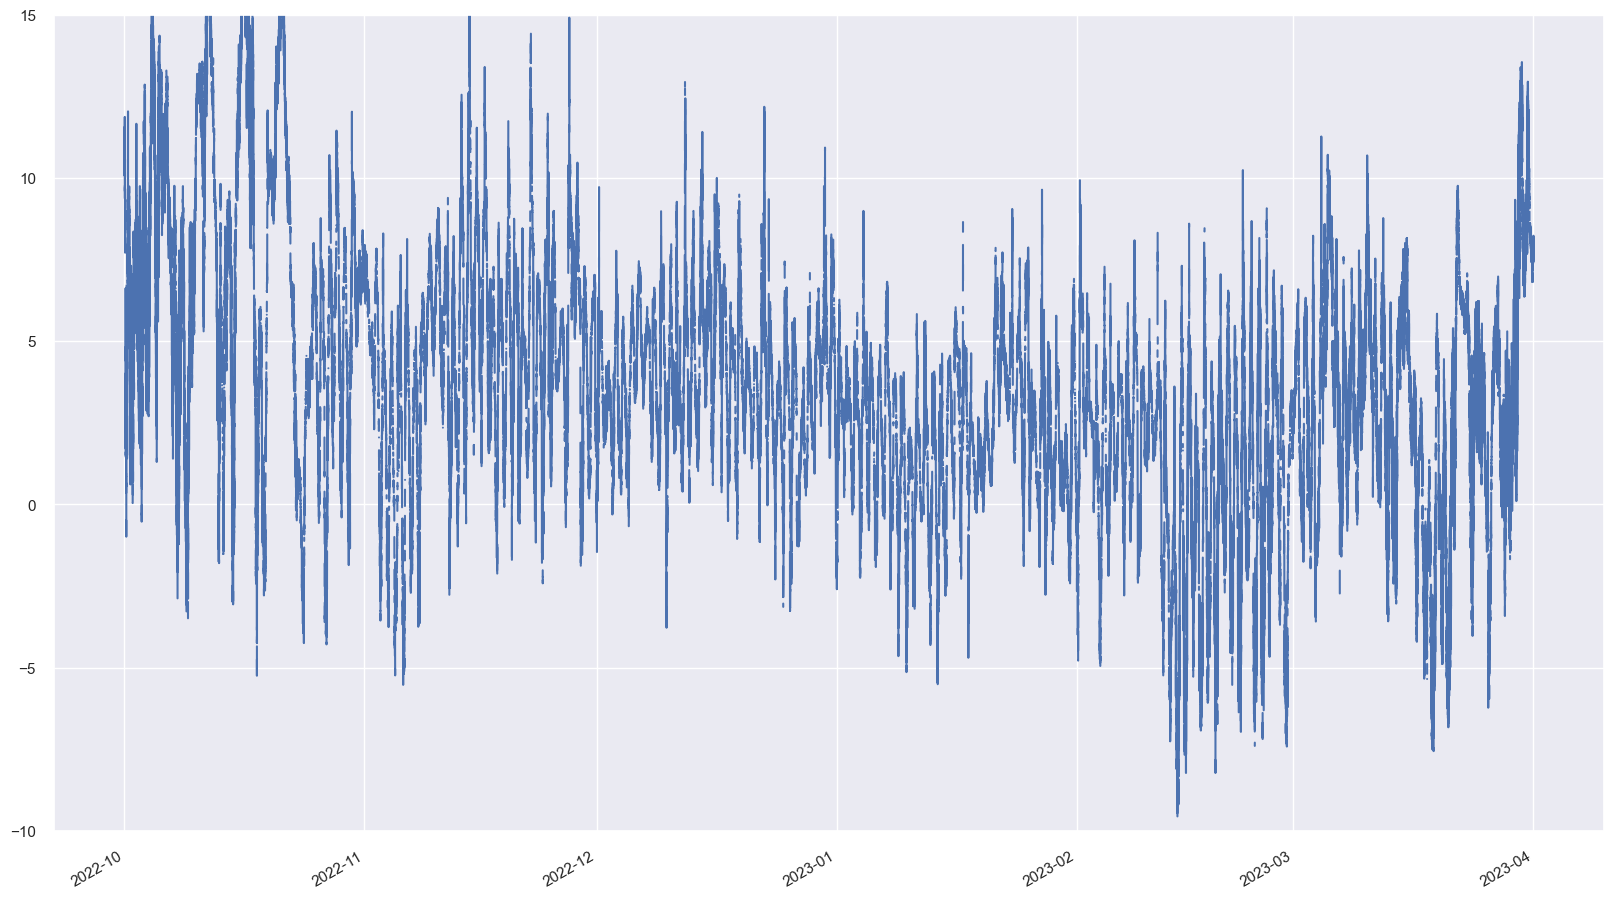

In [389]:
ax = (taf.loc['2022-10':'2023-03','T']-taf.loc['2022-10':'2023-03','T0']).plot(figsize=(20,12))
ax.set_ylim(-10,15)

In [392]:
df2223 = pd.DataFrame(columns=pd.MultiIndex.from_product([TimeOfYear, Variable, Stat], names=['Time of year', 'Variable', 'Statistic']), index=taf.loc['2023-01-01'].index[range(0,1440,15)], dtype='float')
df2223

Time of year               O2                                       ...  F1  \
Variable                    T                                   T0  ... T40   
Statistic                 min 10% 25% med mean 75% 90% max std min  ... std   
2023-01-01 00:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 00:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 00:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 00:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 01:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
...                        ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..   
2023-01-01 22:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
2023-01-01 23:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   

Time of year                                                    
Variable                  T50                                   
Statistic                 min 10% 25% med mean 75% 90% max std  
2023-01-01 00:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 00:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 00:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 00:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 01:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
...                        ..  ..  ..  ..  ...  ..  ..  ..  ..  
2023-01-01 22:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:00:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:15:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:30:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  
2023-01-01 23:45:00+00:00 NaN NaN NaN NaN  NaN NaN NaN NaN NaN  

[96 rows x 504 columns]

In [393]:
times = pd.DataFrame(index=TimeOfYear, data={'start': pd.to_datetime(['2022-10-16', '2022-11-01', '2022-11-16', '2022-12-01',
                                                       '2022-12-16', '2023-01-01', '2023-01-16', '2023-02-01'], utc=True) - pd.Timedelta(minutes=7.5),
                                             'end': pd.to_datetime(['2022-10-30', '2022-11-15', '2022-11-30', '2022-12-15',
                                                     '2022-12-30', '2023-01-15', '2023-01-30', '2023-02-15'], utc=True) + pd.Timedelta(minutes=1447.5)})
for toy in TimeOfYear:
    tmp = taf.loc[times.loc[toy, 'start']:times.loc[toy, 'end'], :]
    for tod in df2223.index:
        tmp1 = tmp.between_time((tod-pd.Timedelta(minutes=7.5)).strftime('%H:%M:%S'), (tod+pd.Timedelta(minutes=7.5)).strftime('%H:%M:%S'))
        for s in Stat:
            if s=='min':
                tmp2 = tmp1.min()
            elif s=='10%':
                tmp2 = tmp1.quantile(0.1)
            elif s=='25%':
                tmp2 = tmp1.quantile(0.25)
            elif s=='med':
                tmp2 = tmp1.quantile(0.5)
            elif s=='mean':
                tmp2 = tmp1.mean()
            elif s=='75%':
                tmp2 = tmp1.quantile(0.75)
            elif s=='90%':
                tmp2 = tmp1.quantile(0.9)
            elif s=='max':
                tmp2 = tmp1.max()
            elif s=='std':
                tmp2 = tmp1.std()
            for v in Variable:
                df2223.loc[tod, (toy, v, s)] = tmp2.loc[v]

titles = ['Late October', 'Early November', 'Late November', 'Early December', 'Late December', 'Early January', 'Late January', 'Early February']

In [394]:
df2223

Time of year                 O2                                                \
Variable                      T                                                 
Statistic                   min    10%     25%   med       mean     75%   90%   
2023-01-01 00:00:00+00:00 -24.1 -22.70 -20.425 -17.0 -16.325417 -12.375 -8.80   
2023-01-01 00:15:00+00:00 -24.6 -23.20 -20.800 -17.1 -16.356889 -10.800 -8.84   
2023-01-01 00:30:00+00:00 -25.7 -23.60 -21.800 -16.9 -16.276000 -10.700 -7.90   
2023-01-01 00:45:00+00:00 -25.5 -23.40 -22.300 -16.9 -16.267556 -10.800 -7.54   
2023-01-01 01:00:00+00:00 -24.2 -23.40 -22.800 -17.7 -16.571556 -10.700 -7.80   
...                         ...    ...     ...   ...        ...     ...   ...   
2023-01-01 22:45:00+00:00 -22.8 -22.00 -18.900 -17.5 -16.002222 -12.600 -8.10   
2023-01-01 23:00:00+00:00 -25.5 -22.40 -21.200 -17.6 -16.489778 -12.600 -8.24   
2023-01-01 23:15:00+00:00 -24.0 -22.36 -21.500 -16.9 -16.603111 -12.700 -8.60   
2023-01-01 23:30:00+00:00 -24.2 -22.80 -22.000 -17.0 -16.786667 -12.800 -8.90   
2023-01-01 23:45:00+00:00 -24.0 -22.80 -21.500 -17.2 -16.621333 -12.800 -8.80   

Time of year                                     ...        F1                \
Variable                                     T0  ...       T40    T50          
Statistic                  max       std    min  ...       std    min    10%   
2023-01-01 00:00:00+00:00 -6.4  5.087311 -24.31  ...  0.470024 -13.50 -12.93   
2023-01-01 00:15:00+00:00 -6.3  5.413678 -24.31  ...  0.319217 -12.99 -12.42   
2023-01-01 00:30:00+00:00 -5.9  5.684546 -24.31  ...  0.319075 -12.99 -12.42   
2023-01-01 00:45:00+00:00 -5.7  5.744995 -24.25  ...  0.318827 -12.99 -12.42   
2023-01-01 01:00:00+00:00 -5.8  5.828187 -24.25  ...  0.321830 -12.99 -12.42   
...                        ...       ...    ...  ...       ...    ...    ...   
2023-01-01 22:45:00+00:00 -7.0  4.762628 -22.97  ...  0.465351 -13.50 -12.93   
2023-01-01 23:00:00+00:00 -6.7  5.294221 -22.97  ...  0.462155 -13.50 -12.93   
2023-01-01 23:15:00+00:00 -6.7  5.210715 -22.91  ...  0.466159 -13.50 -12.93   
2023-01-01 23:30:00+00:00 -6.5  5.269903 -22.91  ...  0.466784 -13.50 -12.93   
2023-01-01 23:45:00+00:00 -6.5  5.125731 -22.91  ...  0.471505 -13.50 -12.93   

Time of year                                                              \
Variable                                                                   
Statistic                    25%    med       mean     75%    90%    max   
2023-01-01 00:00:00+00:00 -12.36 -12.29 -12.329458 -12.085 -11.91 -11.85   
2023-01-01 00:15:00+00:00 -12.36 -12.23 -12.251920 -12.040 -11.91 -11.85   
2023-01-01 00:30:00+00:00 -12.36 -12.23 -12.249733 -12.040 -11.91 -11.85   
2023-01-01 00:45:00+00:00 -12.36 -12.23 -12.253289 -12.040 -11.91 -11.85   
2023-01-01 01:00:00+00:00 -12.36 -12.23 -12.250045 -12.040 -11.91 -11.85   
...                          ...    ...        ...     ...    ...    ...   
2023-01-01 22:45:00+00:00 -12.42 -12.29 -12.358000 -12.100 -12.04 -11.85   
2023-01-01 23:00:00+00:00 -12.42 -12.29 -12.354889 -12.100 -12.04 -11.85   
2023-01-01 23:15:00+00:00 -12.42 -12.29 -12.355511 -12.100 -12.04 -11.85   
2023-01-01 23:30:00+00:00 -12.42 -12.29 -12.353867 -12.100 -12.04 -11.85   
2023-01-01 23:45:00+00:00 -12.42 -12.29 -12.356429 -12.100 -12.04 -11.85   

Time of year                         
Variable                             
Statistic                       std  
2023-01-01 00:00:00+00:00  0.383720  
2023-01-01 00:15:00+00:00  0.256210  
2023-01-01 00:30:00+00:00  0.258469  
2023-01-01 00:45:00+00:00  0.258101  
2023-01-01 01:00:00+00:00  0.264322  
...                             ...  
2023-01-01 22:45:00+00:00  0.376269  
2023-01-01 23:00:00+00:00  0.374526  
2023-01-01 23:15:00+00:00  0.376420  
2023-01-01 23:30:00+00:00  0.379572  
2023-01-01 23:45:00+00:00  0.382864  

[96 rows x 504 columns]

In [395]:
df2223.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2023-01-01 00:00:00+00:00 to 2023-01-01 23:45:00+00:00
Columns: 504 entries, ('O2', 'T', 'min') to ('F1', 'T50', 'std')
dtypes: float64(504)
memory usage: 380.8 KB


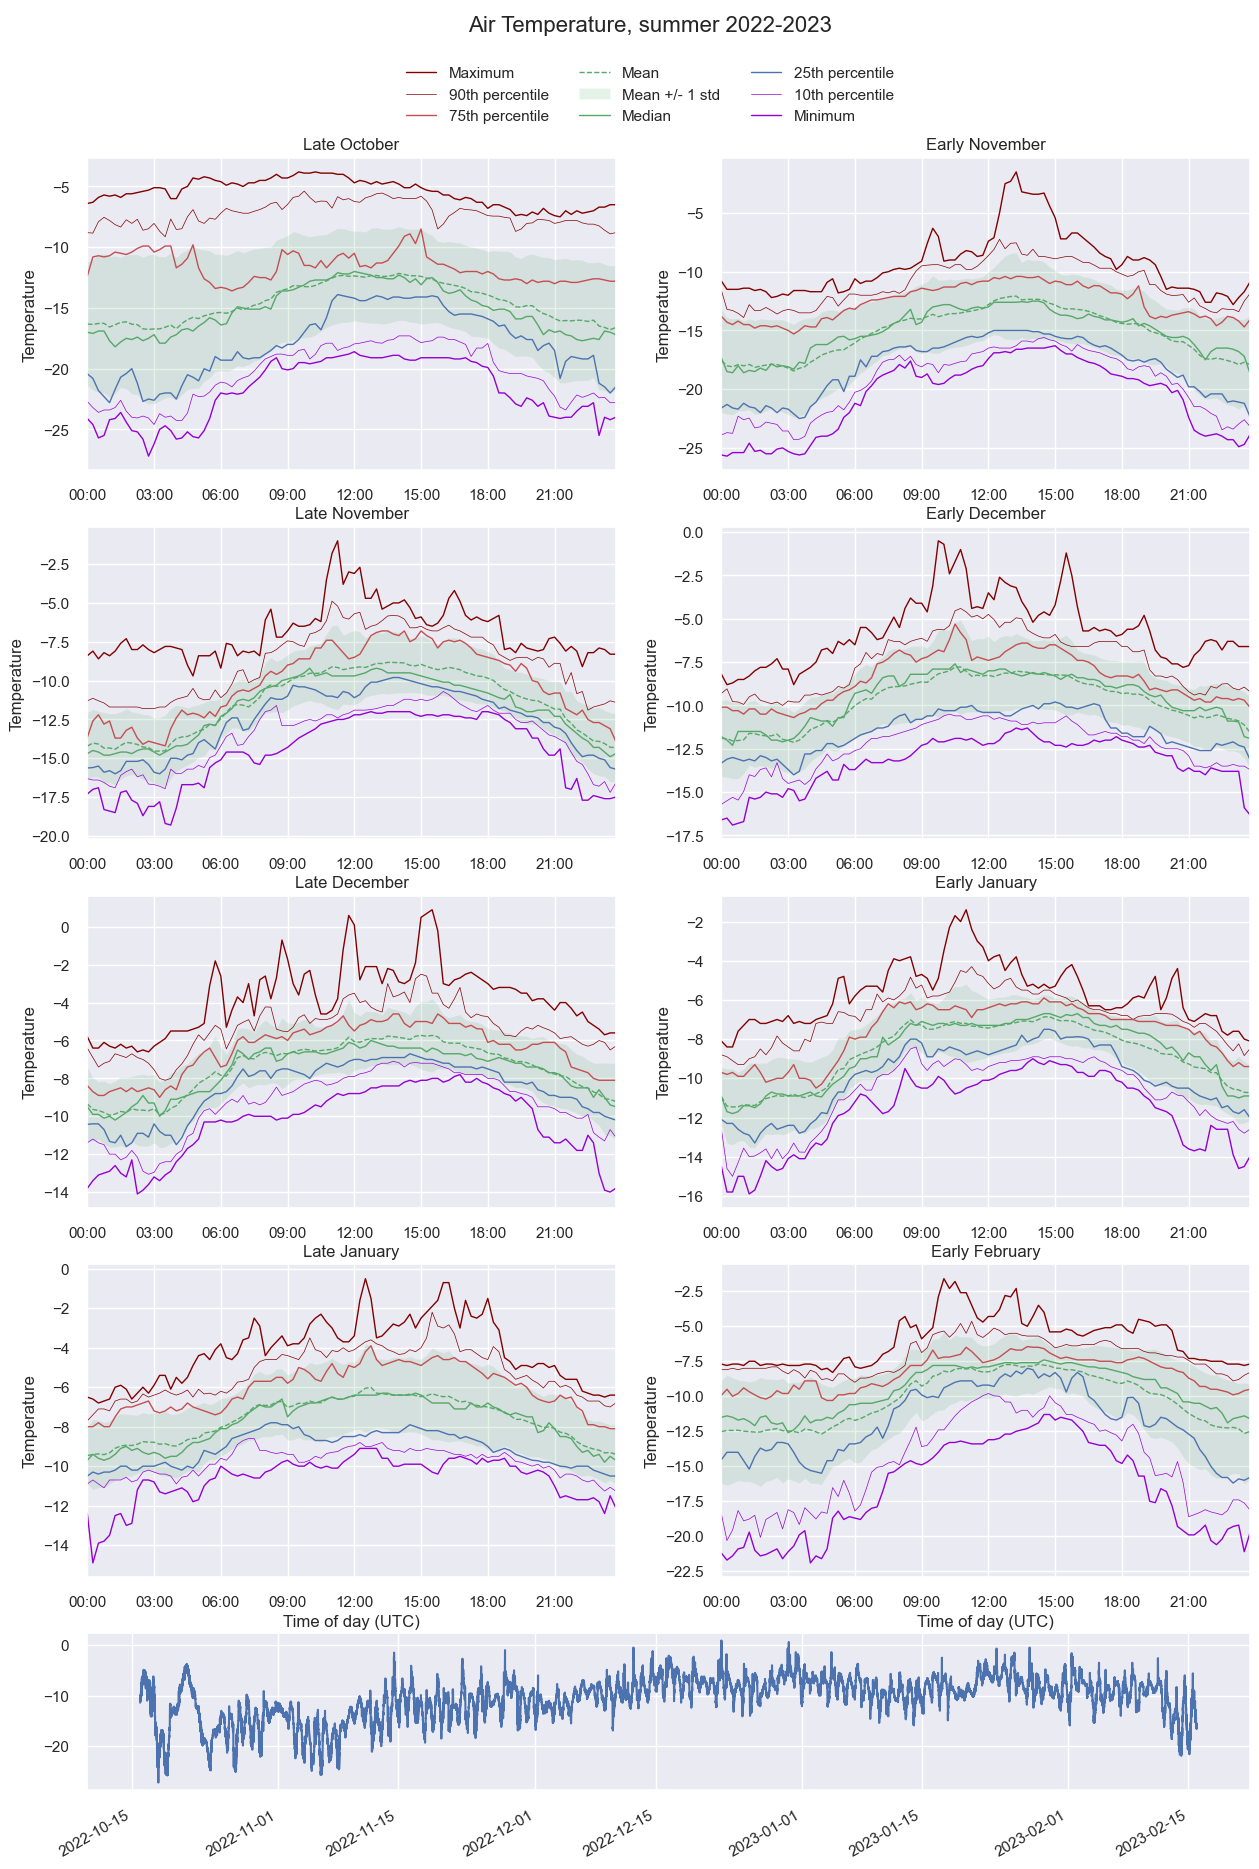

In [396]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df2223.loc[:, (TimeOfYear[a], 'T', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df2223.loc[:, (TimeOfYear[a], 'T', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df2223.index, df2223.loc[:, (TimeOfYear[a], 'T', 'mean')] - df2223.loc[:, (TimeOfYear[a], 'T', 'std')],
                                       df2223.loc[:, (TimeOfYear[a], 'T', 'mean')] + df2223.loc[:, (TimeOfYear[a], 'T', 'std')], facecolor='g', alpha=0.15)
    df2223.loc[:, (TimeOfYear[a], 'T', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df2223.index[::12])
    axs[chr(65+a)].set_xticklabels(df2223.index[::12].strftime('%H:%M'))
taf.loc['2022-10-16':'2023-02-15', 'T'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='Air Temperature, summer 2022-2023\n', title_fontsize=16);
fig.savefig('DiurnalAir22-23.png')

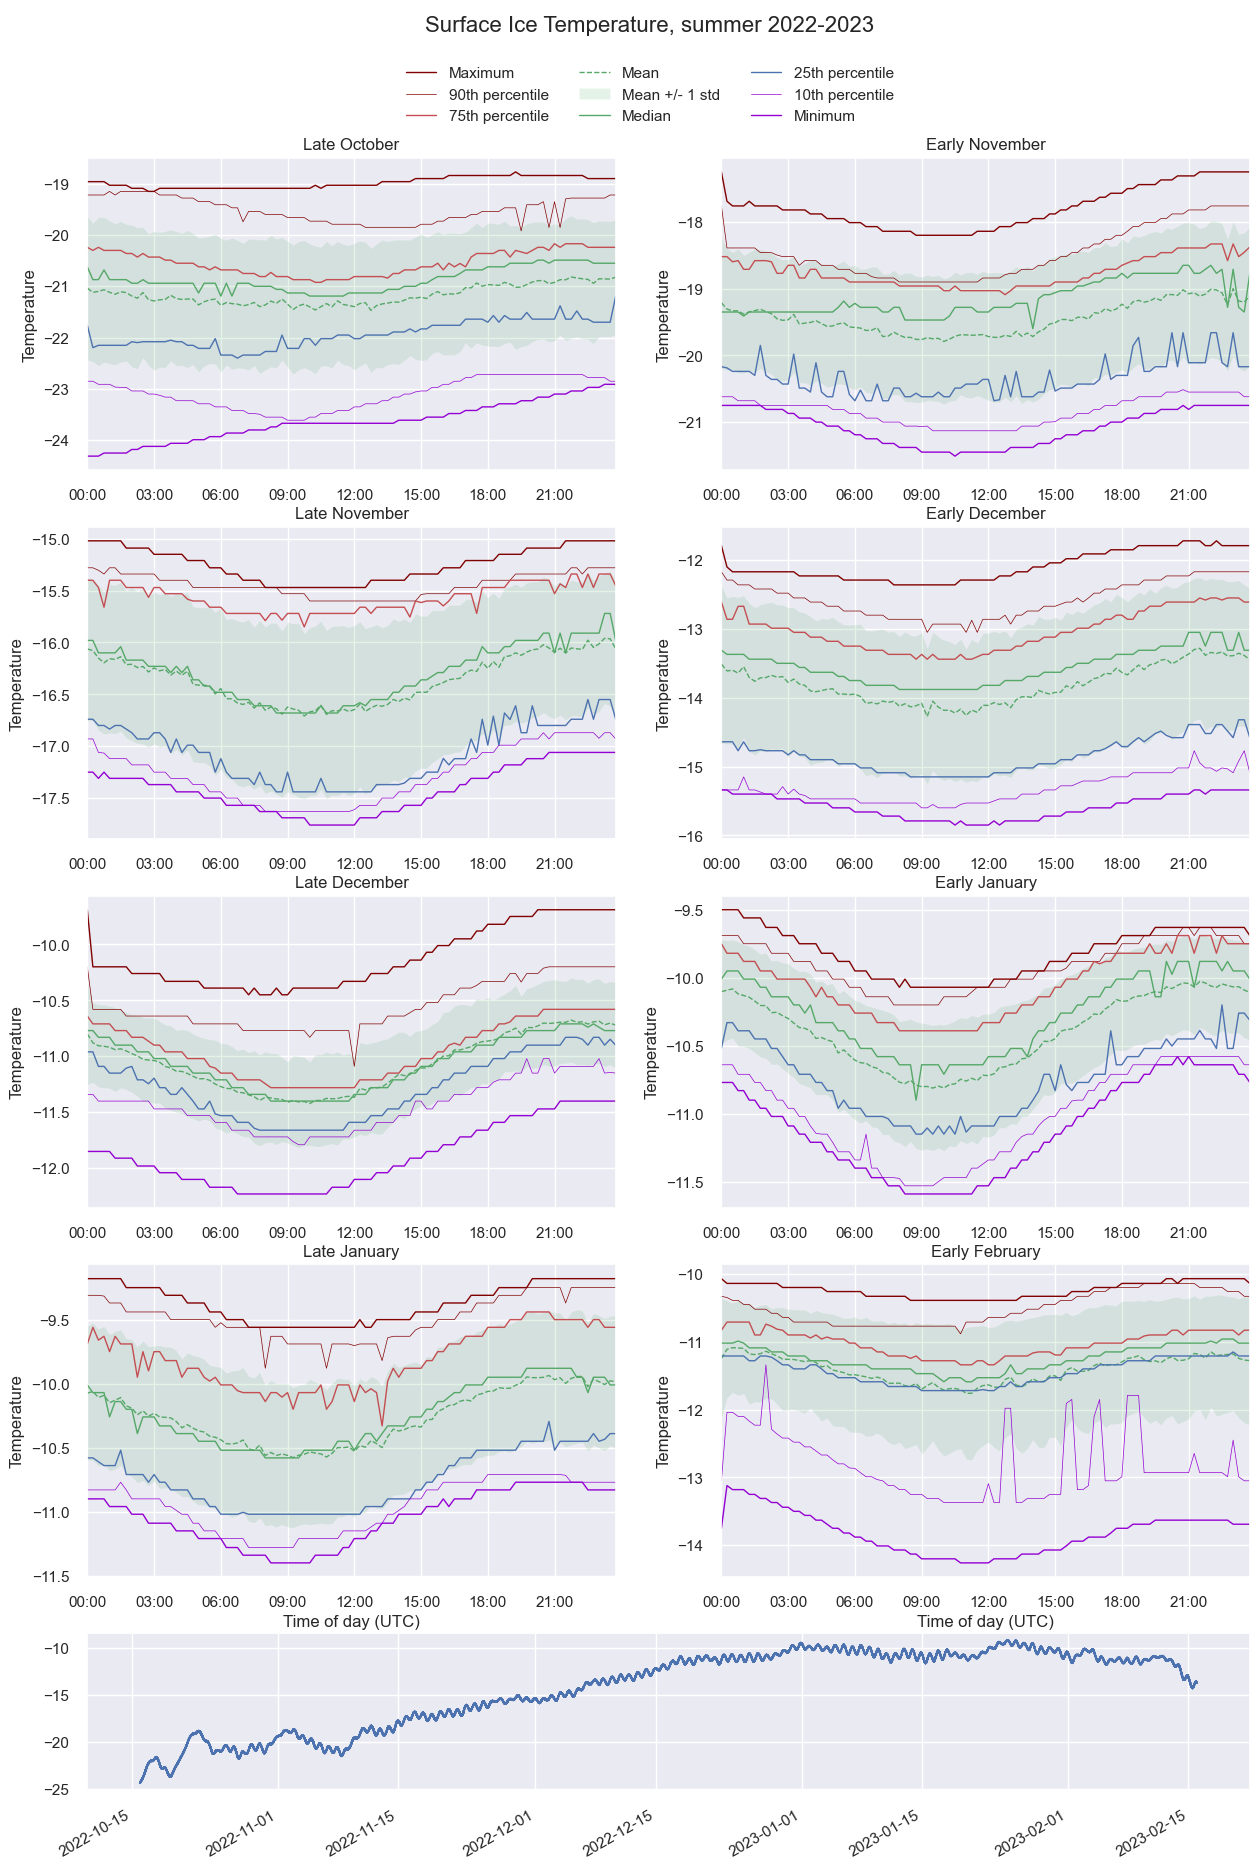

In [397]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df2223.loc[:, (TimeOfYear[a], 'T0', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df2223.loc[:, (TimeOfYear[a], 'T0', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df2223.index, df2223.loc[:, (TimeOfYear[a], 'T0', 'mean')] - df2223.loc[:, (TimeOfYear[a], 'T0', 'std')],
                                       df2223.loc[:, (TimeOfYear[a], 'T0', 'mean')] + df2223.loc[:, (TimeOfYear[a], 'T0', 'std')], facecolor='g', alpha=0.15)
    df2223.loc[:, (TimeOfYear[a], 'T0', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T0', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T0', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T0', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T0', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T0', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T0', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df2223.index[::12])
    axs[chr(65+a)].set_xticklabels(df2223.index[::12].strftime('%H:%M'))
taf.loc['2022-10-16':'2023-02-15', 'T0'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='Surface Ice Temperature, summer 2022-2023\n', title_fontsize=16);
fig.savefig('DiurnalSurface22-23.png')

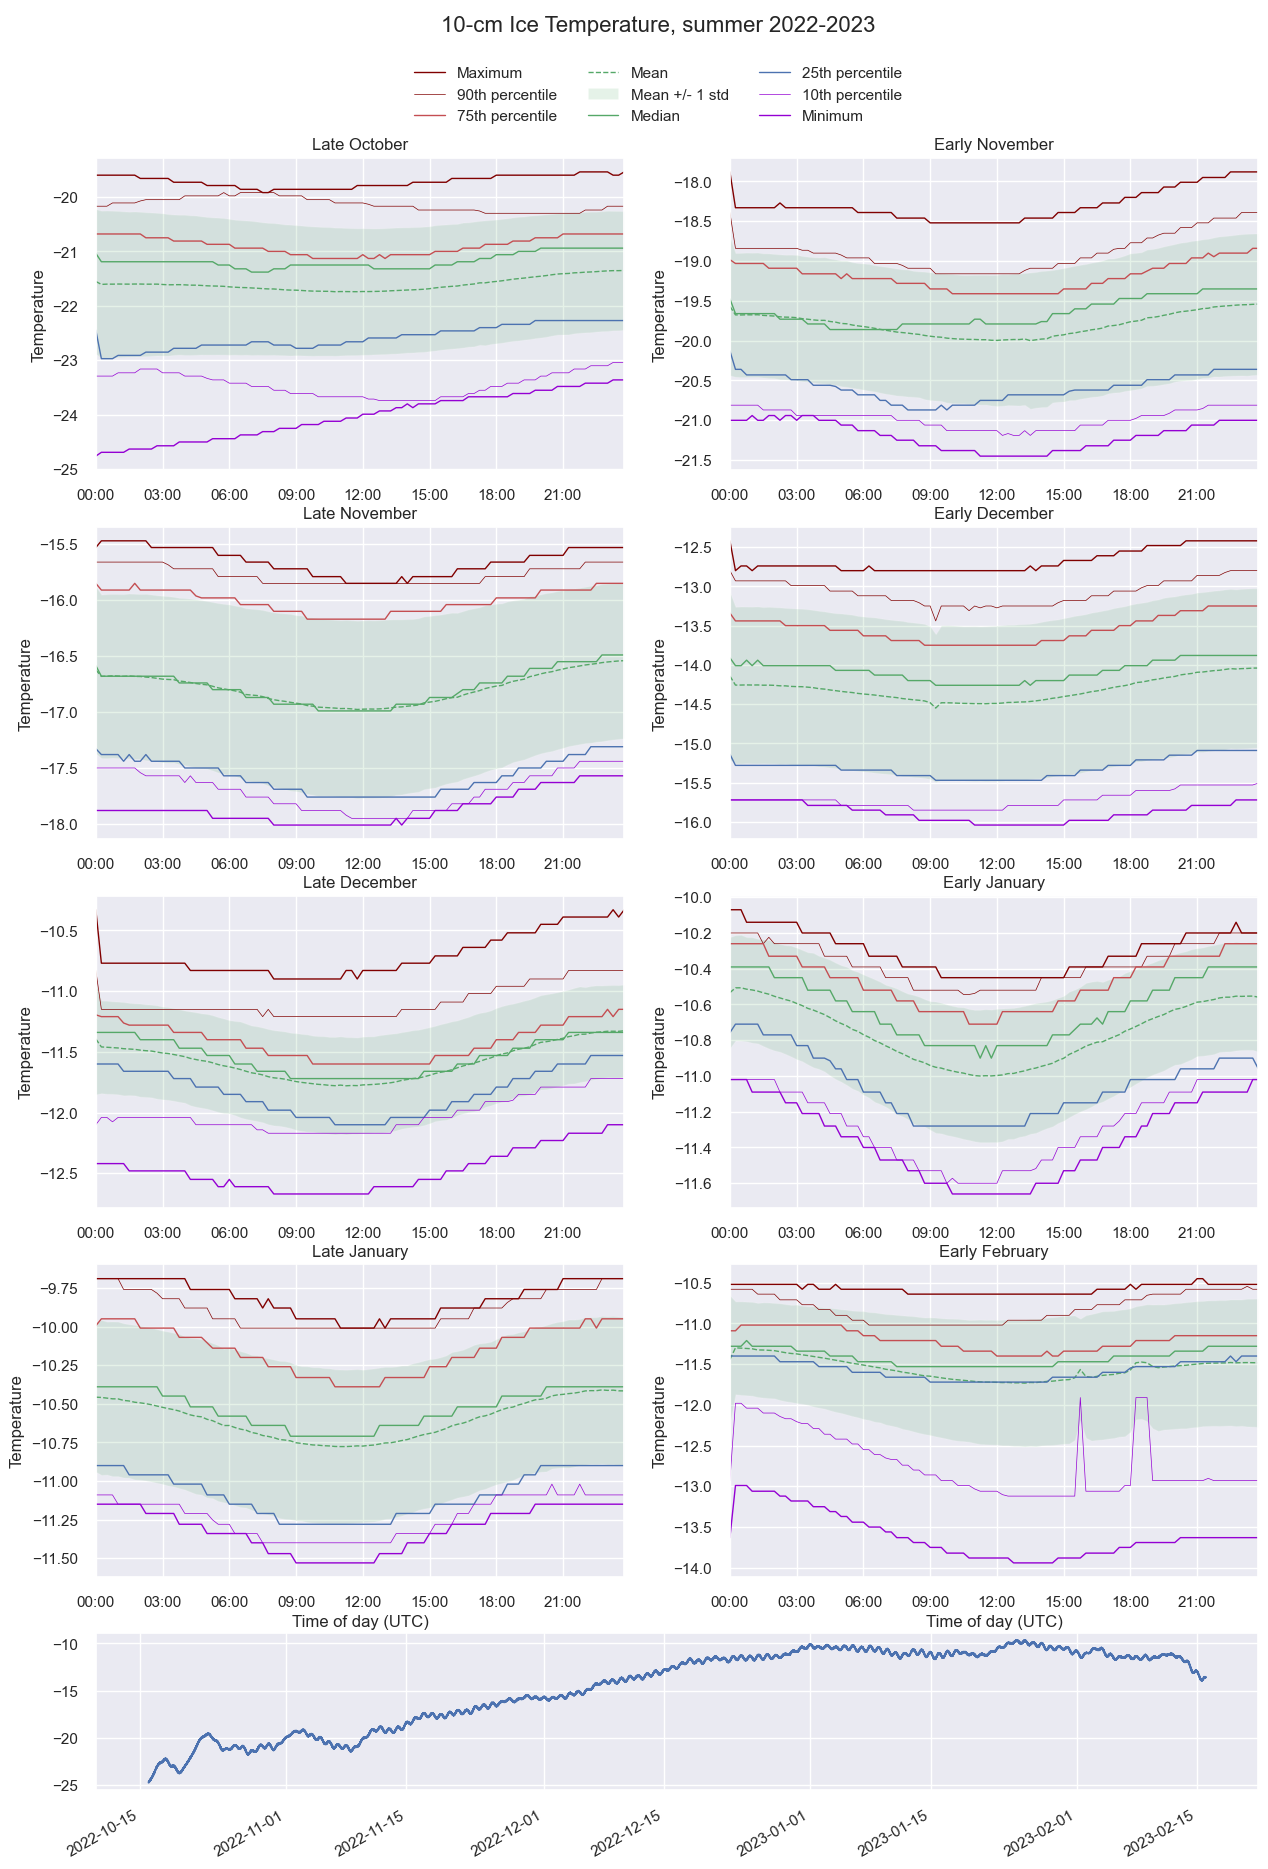

In [398]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df2223.loc[:, (TimeOfYear[a], 'T10', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df2223.loc[:, (TimeOfYear[a], 'T10', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df2223.index, df2223.loc[:, (TimeOfYear[a], 'T10', 'mean')] - df2223.loc[:, (TimeOfYear[a], 'T10', 'std')],
                                       df2223.loc[:, (TimeOfYear[a], 'T10', 'mean')] + df2223.loc[:, (TimeOfYear[a], 'T10', 'std')], facecolor='g', alpha=0.15)
    df2223.loc[:, (TimeOfYear[a], 'T10', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T10', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T10', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T10', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T10', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T10', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T10', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df2223.index[::12])
    axs[chr(65+a)].set_xticklabels(df2223.index[::12].strftime('%H:%M'))
taf.loc['2022-10-16':'2023-02-15', 'T10'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='10-cm Ice Temperature, summer 2022-2023\n', title_fontsize=16);
fig.savefig('Diurnal10cm22-23.png')

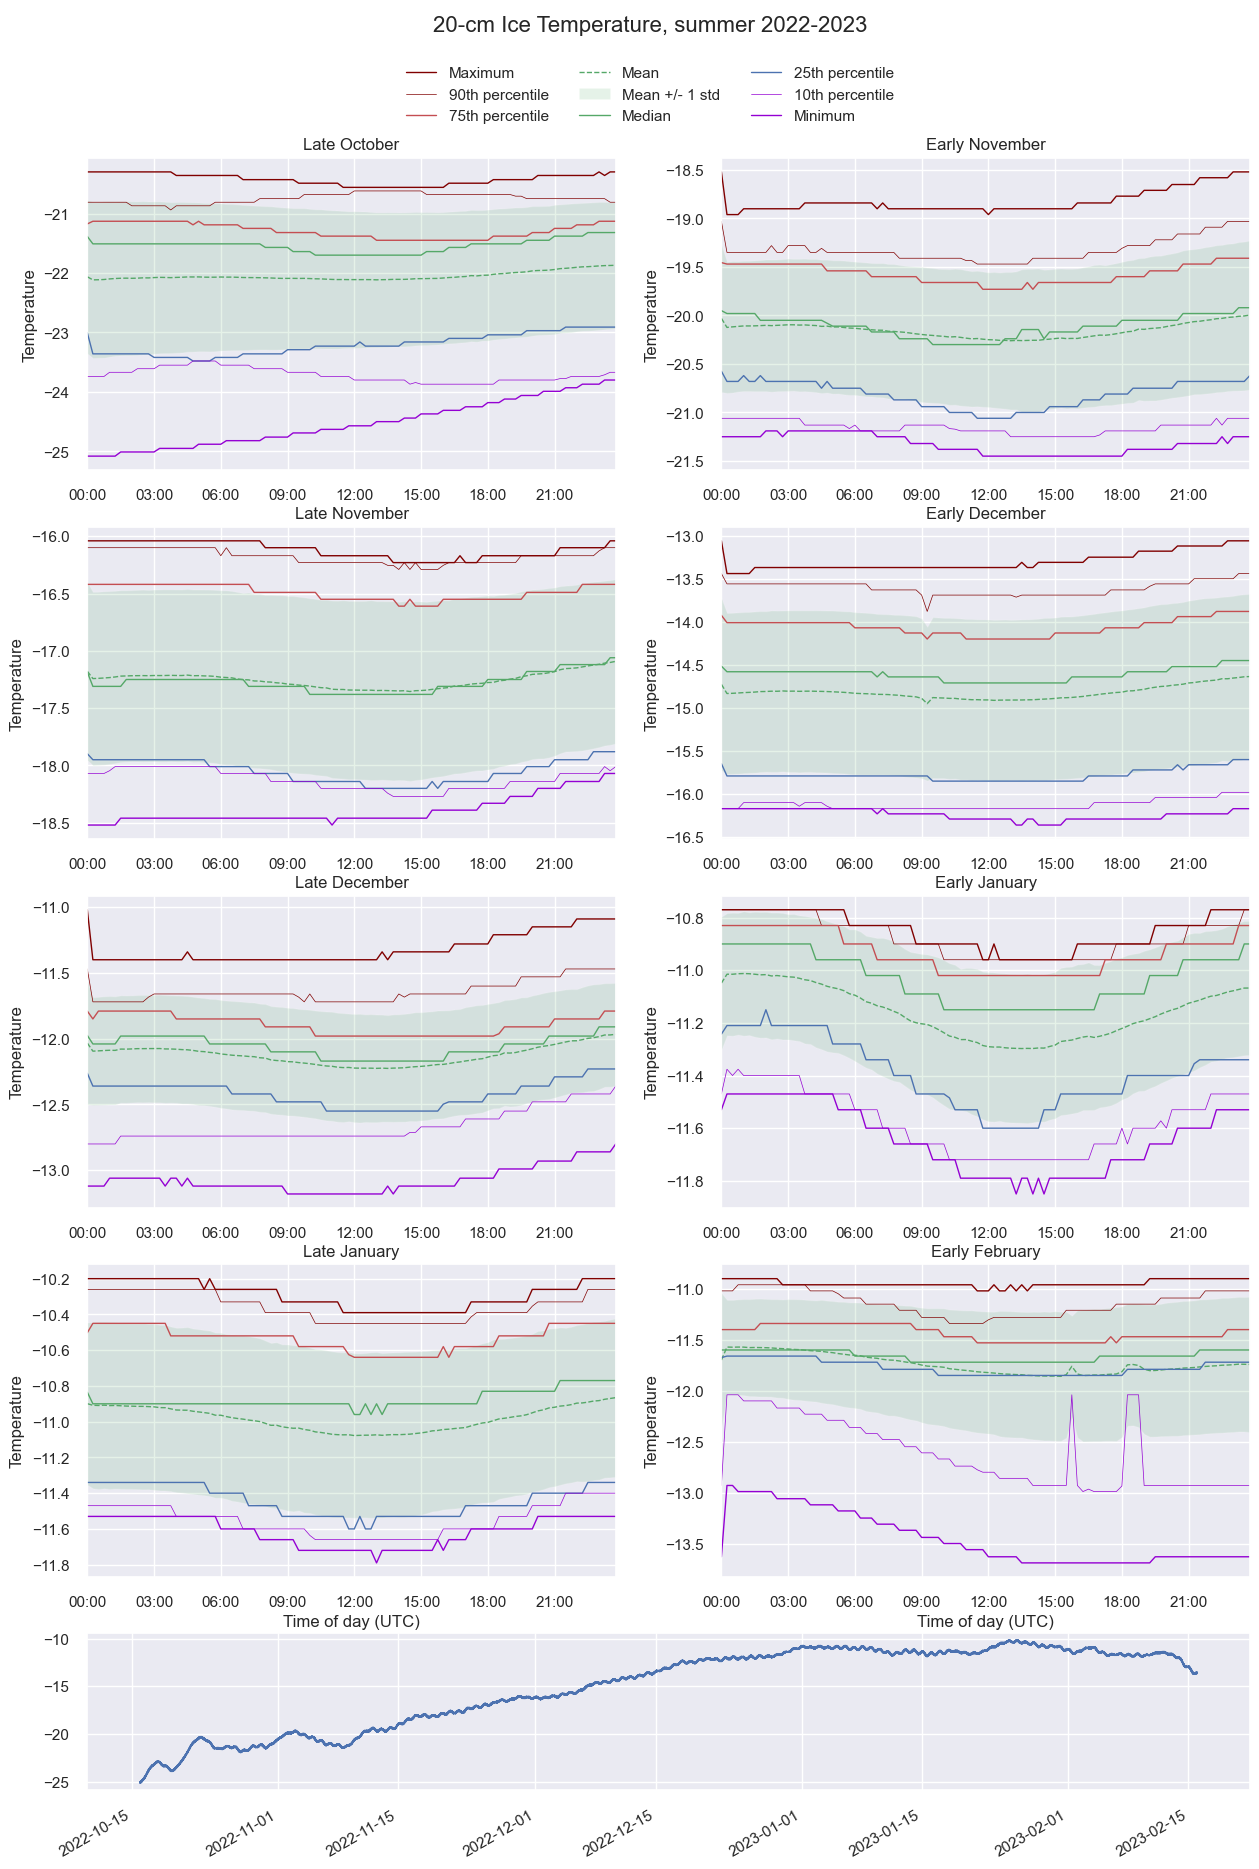

In [399]:
fig, axs = plt.subplot_mosaic('AB;CD;EF;GH;II', figsize=(15,24), height_ratios=[1, 1, 1, 1, 0.5])
for a in range(0,8):
    if a<6:
        df2223.loc[:, (TimeOfYear[a], 'T20', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', title=titles[a])
    else:
        df2223.loc[:, (TimeOfYear[a], 'T20', 'max')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=1, ylabel='Temperature', xlabel='Time of day (UTC)', title=titles[a])
    axs[chr(65+a)].fill_between(df2223.index, df2223.loc[:, (TimeOfYear[a], 'T20', 'mean')] - df2223.loc[:, (TimeOfYear[a], 'T20', 'std')],
                                       df2223.loc[:, (TimeOfYear[a], 'T20', 'mean')] + df2223.loc[:, (TimeOfYear[a], 'T20', 'std')], facecolor='g', alpha=0.15)
    df2223.loc[:, (TimeOfYear[a], 'T20', '90%')].plot(ax=axs[chr(65+a)], style='maroon', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T20', '75%')].plot(ax=axs[chr(65+a)], style='r', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T20', 'mean')].plot(ax=axs[chr(65+a)], style='g--', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T20', 'med')].plot(ax=axs[chr(65+a)], style='g', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T20', '25%')].plot(ax=axs[chr(65+a)], style='b', linewidth=1)
    df2223.loc[:, (TimeOfYear[a], 'T20', '10%')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=0.5)
    df2223.loc[:, (TimeOfYear[a], 'T20', 'min')].plot(ax=axs[chr(65+a)], style='darkviolet', linewidth=1)
    axs[chr(65+a)].set_xticks(df2223.index[::12])
    axs[chr(65+a)].set_xticklabels(df2223.index[::12].strftime('%H:%M'))
taf.loc['2022-10-16':'2023-02-15', 'T20'].plot(ax=axs[chr(65+a+1)])
ch = axs[chr(65+a)].get_children()[0:9]
fig.legend([ch[0], ch[2], ch[3], ch[4], ch[1], ch[5], ch[6], ch[7], ch[8]],
           ['Maximum', '90th percentile', '75th percentile', 'Mean', 'Mean +/- 1 std', 'Median', '25th percentile', '10th percentile', 'Minimum'],
           ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.945), title='20-cm Ice Temperature, summer 2022-2023\n', title_fontsize=16);
fig.savefig('Diurnal20cm22-23')

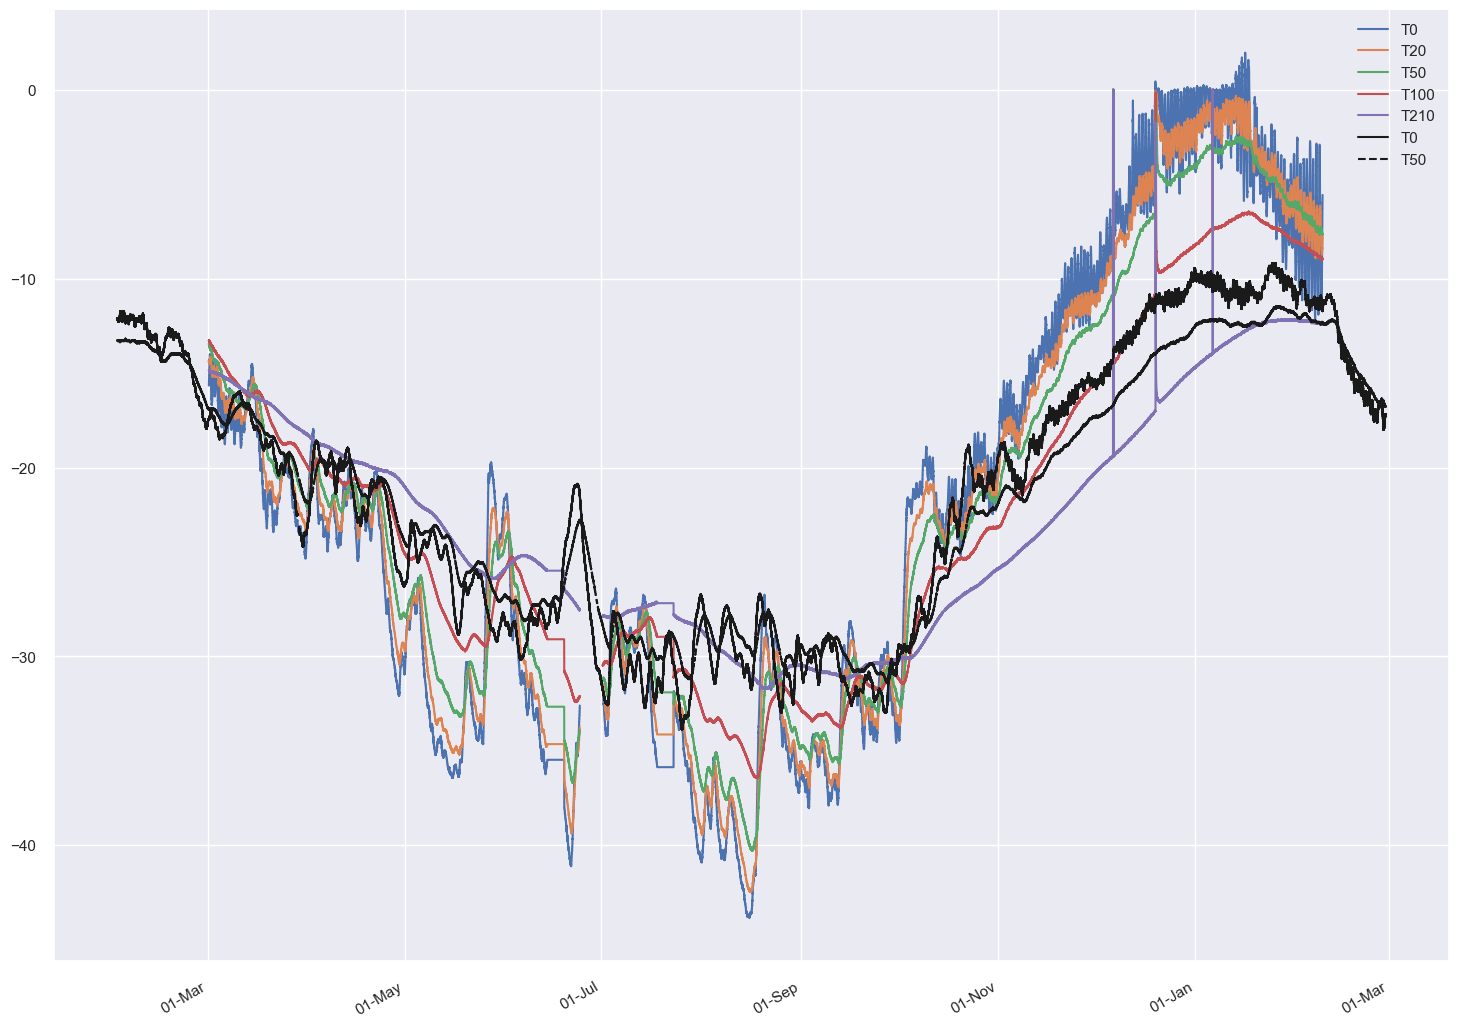

In [435]:
ax = taf.loc['2019-02':'2020-02-28', ['T0', 'T20', 'T50', 'T100', 'T210']].plot(figsize=(18,14))
taf.loc['2022-02':'2023-02', ['T0', 'T50']].shift(-3*365-1,freq='D').plot(ax=ax, style=['k-', 'k--'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.savefig('year.png')

In [22]:
df = pd.DataFrame(columns=pd.MultiIndex.from_product([TimeOfYear, Variable, Stat], names=['Time of year', 'Variable', 'Statistic']), index=taf.loc['2023-02-02'].index.time)
df

Time of year   O2                                               ...   F1       \
Variable        T                                           T0  ...  T40  T50   
Statistic     min  10%  25%  med mean  75%  90%  max  std  min  ...  std  min   
00:00:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
00:01:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
00:02:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
00:03:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
00:04:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
23:55:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
23:56:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
23:57:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
23:58:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
23:59:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

Time of year                                          
Variable                                              
Statistic     10%  25%  med mean  75%  90%  max  std  
00:00:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
00:01:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
00:02:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
00:03:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
00:04:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...  ...  
23:55:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
23:56:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
23:57:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
23:58:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
23:59:00      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1440 rows x 504 columns]

In [8]:
taf.loc['2023-01-14':'2023-01-28','T'].between_time('12:07:30','12:22:30').mean()

-6.354222222222221

In [9]:
taf.loc['2023-01-14':'2023-01-28','T'].between_time('00:07:30','00:22:30').mean()

-9.981250000000001

In [10]:
print(taf.loc['2023-01-14':'2023-01-28', 'T'].between_time('00:07:30','00:22:30').apply(lambda x:x).iloc[0:18])
print(taf.loc['2023-01-14':'2023-01-28', 'T'].between_time('00:07:30','00:22:30').apply(lambda x:x).iloc[-3:])

measured
2023-01-14 00:08:00+00:00   -14.6
2023-01-14 00:09:00+00:00   -14.8
2023-01-14 00:10:00+00:00   -15.0
2023-01-14 00:11:00+00:00   -15.1
2023-01-14 00:12:00+00:00   -15.3
2023-01-14 00:13:00+00:00   -15.4
2023-01-14 00:14:00+00:00   -15.5
2023-01-14 00:15:00+00:00   -15.6
2023-01-14 00:16:00+00:00   -15.7
2023-01-14 00:17:00+00:00   -15.7
2023-01-14 00:18:00+00:00   -15.7
2023-01-14 00:19:00+00:00   -15.8
2023-01-14 00:20:00+00:00   -15.8
2023-01-14 00:21:00+00:00   -15.8
2023-01-14 00:22:00+00:00   -15.8
2023-01-15 00:08:00+00:00   -12.7
2023-01-15 00:09:00+00:00   -12.7
2023-01-15 00:10:00+00:00   -12.7
Name: T, dtype: float64
measured
2023-01-28 00:20:00+00:00   -10.0
2023-01-28 00:21:00+00:00   -10.1
2023-01-28 00:22:00+00:00   -10.1
Name: T, dtype: float64


In [11]:
taf.loc['2023-01-14':'2023-01-28',:].groupby(taf.loc['2023-01-14':'2023-01-28',:].index.time,group_keys=True).apply(lambda x: x).iloc[14*15:16*15]

T210   T100    T10    T20    T30  T1300  \
         measured                                                              
00:14:00 2023-01-14 00:14:00+00:00 -17.44 -14.26 -10.71 -11.15 -11.60 -22.78   
         2023-01-15 00:14:00+00:00 -17.37 -14.26 -10.96 -11.34 -11.79 -22.78   
         2023-01-16 00:14:00+00:00 -17.31 -14.20 -11.02 -11.47 -11.85 -22.78   
         2023-01-18 00:14:00+00:00 -17.18 -14.20 -10.71 -11.28 -11.66 -22.78   
         2023-01-19 00:14:00+00:00 -17.18 -14.13 -10.90 -11.28 -11.66 -22.78   
         2023-01-20 00:14:00+00:00 -17.12 -14.13 -11.15 -11.40 -11.72 -22.78   
         2023-01-21 00:14:00+00:00 -17.06 -14.07 -11.15 -11.47 -11.85 -22.78   
         2023-01-22 00:14:00+00:00 -16.99 -14.07 -10.90 -11.34 -11.72 -22.78   
         2023-01-23 00:14:00+00:00 -16.93 -14.07 -10.39 -10.90 -11.34 -22.78   
         2023-01-24 00:14:00+00:00 -16.87 -13.94  -9.95 -10.52 -11.02 -22.85   
         2023-01-25 00:14:00+00:00 -16.87 -13.82  -9.69 -10.26 -10.77 -22.85   
         2023-01-26 00:14:00+00:00 -16.80 -13.69  -9.69 -10.20 -10.71 -22.78   
         2023-01-27 00:14:00+00:00 -16.74 -13.56  -9.95 -10.33 -10.71 -22.78   
         2023-01-28 00:14:00+00:00 -16.68 -13.50 -10.01 -10.45 -10.83 -22.78   
00:15:00 2023-01-14 00:15:00+00:00 -17.44 -14.26 -10.71 -11.15 -11.60 -22.78   
         2023-01-15 00:15:00+00:00 -17.37 -14.26 -10.96 -11.40 -11.72 -22.78   
         2023-01-16 00:15:00+00:00 -17.31 -14.26 -11.09 -11.47 -11.85 -22.78   
         2023-01-17 00:15:00+00:00 -17.25 -14.26 -10.83 -11.34 -11.79 -22.78   
         2023-01-18 00:15:00+00:00 -17.25 -14.20 -10.71 -11.21 -11.72 -22.78   
         2023-01-19 00:15:00+00:00 -17.12 -14.13 -10.90 -11.34 -11.66 -22.78   
         2023-01-20 00:15:00+00:00 -17.12 -14.13 -11.09 -11.40 -11.72 -22.78   
         2023-01-21 00:15:00+00:00 -17.06 -14.13 -11.09 -11.53 -11.85 -22.78   
         2023-01-22 00:15:00+00:00 -16.99 -14.07 -10.83 -11.34 -11.72 -22.78   
         2023-01-23 00:15:00+00:00 -16.93 -14.01 -10.33 -10.90 -11.34 -22.78   
         2023-01-24 00:15:00+00:00 -16.93 -13.94  -9.95 -10.58 -11.02 -22.78   
         2023-01-25 00:15:00+00:00 -16.80 -13.82  -9.69 -10.26 -10.77 -22.78   
         2023-01-26 00:15:00+00:00 -16.80 -13.69  -9.69 -10.20 -10.64 -22.78   
         2023-01-27 00:15:00+00:00 -16.74 -13.56  -9.95 -10.33 -10.71 -22.78   
         2023-01-28 00:15:00+00:00 -16.68 -13.50 -10.01 -10.45 -10.77 -22.85   
00:16:00 2023-01-14 00:16:00+00:00 -17.44 -14.26 -10.71 -11.15 -11.60 -22.78   

                                      T40   T800     T  TI0_50   T400     T0  
         measured                                                             
00:14:00 2023-01-14 00:14:00+00:00 -11.91 -23.42 -15.5  -12.36 -21.32 -10.33  
         2023-01-15 00:14:00+00:00 -11.98 -23.42 -12.3  -12.42 -21.25 -10.64  
         2023-01-16 00:14:00+00:00 -12.10 -23.42  -9.4  -12.55 -21.19 -10.64  
         2023-01-18 00:14:00+00:00 -11.98 -23.36 -14.8  -12.42 -21.06 -10.20  
         2023-01-19 00:14:00+00:00 -11.91 -23.36 -10.3  -12.36 -21.00 -10.58  
         2023-01-20 00:14:00+00:00 -11.98 -23.29 -10.1  -12.36 -20.94 -10.90  
         2023-01-21 00:14:00+00:00 -12.04 -23.29 -10.1  -12.42 -20.81 -10.83  
         2023-01-22 00:14:00+00:00 -11.98 -23.29  -7.4  -12.42 -20.81 -10.39  
         2023-01-23 00:14:00+00:00 -11.72 -23.23  -6.7  -12.17 -20.75  -9.88  
         2023-01-24 00:14:00+00:00 -11.40 -23.23  -8.0  -11.98 -20.62  -9.37  
         2023-01-25 00:14:00+00:00 -11.15 -23.23  -8.1  -11.66 -20.62  -9.18  
         2023-01-26 00:14:00+00:00 -10.96 -23.16  -7.9  -11.53 -20.56  -9.31  
         2023-01-27 00:14:00+00:00 -11.02 -23.16  -9.0  -11.53 -20.49  -9.56  
         2023-01-28 00:14:00+00:00 -11.09 -23.16  -9.9  -11.60 -20.43  -9.69  
00:15:00 2023-01-14 00:15:00+00:00 -11.91 -23.42 -15.6  -12.36 -21.32 -10.33  
         2023-01-15 00:15:00+00:00 -11.98 -23.42 -12.3  -12.42 -21.25 -10.64  
         2023-01-16 00:15:00+00:00 -12.10 -23.42  -9.4

In [12]:
tmp = taf.loc['2023-01-14':'2023-01-28',:].groupby(taf.loc['2023-01-14':'2023-01-28',:].index.time,group_keys=True).mean()
tmp.iloc[7:24]

T210       T100        T10        T20        T30      T1300  \
00:07:00 -17.048667 -14.010667 -10.521333 -10.990000 -11.392000 -22.780000   
00:08:00 -17.052667 -14.010667 -10.526667 -10.990000 -11.404667 -22.798667   
00:09:00 -17.048667 -14.010667 -10.530000 -10.998000 -11.392667 -22.798667   
00:10:00 -17.048667 -14.010667 -10.530000 -10.985333 -11.392000 -22.803333   
00:11:00 -17.057333 -14.011333 -10.534000 -10.985333 -11.396667 -22.784667   
00:12:00 -17.056000 -14.010667 -10.530000 -10.989333 -11.392000 -22.784667   
00:13:00 -17.056667 -14.006667 -10.534000 -10.977333 -11.388000 -22.798667   
00:14:00 -17.038571 -13.992857 -10.512857 -10.956429 -11.373571 -22.790000   
00:15:00 -17.052667 -14.014667 -10.522000 -10.993333 -11.392000 -22.784667   
00:16:00 -17.044000 -14.014667 -10.534000 -10.989333 -11.396000 -22.784667   
00:17:00 -17.047333 -14.006667 -10.520667 -10.981333 -11.391333 -22.789333   
00:18:00 -17.061333 -14.010000 -10.525333 -10.981333 -11.392000 -22.784667   
00:19:00 -17.047333 -14.006667 -10.525333 -10.989333 -11.392667 -22.789333   
00:20:00 -17.043333 -14.002667 -10.529333 -10.994000 -11.396667 -22.798667   
00:21:00 -17.053333 -14.015333 -10.525333 -10.989333 -11.400667 -22.808000   
00:22:00 -17.048000 -14.006667 -10.525333 -10.982000 -11.392667 -22.803333   
00:23:00 -17.061333 -14.006667 -10.530000 -10.990000 -11.396667 -22.798667   

                T40       T800          T     TI0_50       T400         T0  
00:07:00 -11.692000 -23.300667  -9.780000 -12.140667 -20.868667 -10.173077  
00:08:00 -11.692000 -23.292000  -9.880000 -12.140667 -20.860667 -10.121333  
00:09:00 -11.700667 -23.292000 -10.000000 -12.145333 -20.869333 -10.173077  
00:10:00 -11.692000 -23.288000 -10.080000 -12.140667 -20.868667 -10.155833  
00:11:00 -11.696667 -23.296000 -10.080000 -12.140000 -20.865333  -9.943636  
00:12:00 -11.696667 -23.292000 -10.053333 -12.149333 -20.873333  -9.981667  
00:13:00 -11.692000 -23.296000 -10.026667 -12.141333 -20.868667 -10.111429  
00:14:00 -11.658571 -23.287143  -9.964286 -12.127143 -20.846429 -10.107143  
00:15:00 -11.688000 -23.296000 -10.013333 -12.150667 -20.869333 -10.232308  
00:16:00 -11.688000 -23.296000 -10.006667 -12.146000 -20.864667 -10.232308  
00:17:00 -11.692000 -23.288000  -9.973333 -12.145333 -20.869333 -10.126000  
00:18:00 -11.692000 -23.301333  -9.940000 -12.145333 -20.873333 -10.092857  
00:19:00 -11.692000 -23.296000  -9.933333 -12.146000 -20.860667 -10.153846  
00:20:00 -11.688000 -23.292000  -9.920000 -12.146000 -20.856667 -10.169091  
00:21:00 -11.692000 -23.305333  -9.933333 -12.150000 -20.860000 -10.102500  
00:22:00 -11.688000 -23.292000  -9.913333 -12.145333 -20.873333 -10.126667  
00:23:00 -11.696000 -23.296000  -9.920000 -12.140667 -20.869333 -10.175714

In [13]:
tmp.index = pd.to_datetime('2023-01-21 ' + tmp.index.astype(str))
tmp.rolling('15T', center=True, closed='both').mean().between_time('00:13','00:17')

T210       T100        T10        T20        T30  \
2023-01-21 00:13:00 -17.050438 -14.008679 -10.526724 -10.985717 -11.392549   
2023-01-21 00:14:00 -17.050438 -14.008990 -10.526724 -10.985984 -11.392860   
2023-01-21 00:15:00 -17.050394 -14.008724 -10.526990 -10.985451 -11.392905   
2023-01-21 00:16:00 -17.050971 -14.008457 -10.527213 -10.985451 -11.392371   
2023-01-21 00:17:00 -17.051505 -14.008190 -10.527524 -10.984340 -11.392594   

                         T1300        T40       T800         T     TI0_50  \
2023-01-21 00:13:00 -22.790622 -11.690749 -23.293410 -9.959841 -12.142743   
2023-01-21 00:14:00 -22.791867 -11.690171 -23.294565 -9.972286 -12.143632   
2023-01-21 00:15:00 -22.793422 -11.689905 -23.293987 -9.981175 -12.143943   
2023-01-21 00:16:00 -22.793422 -11.690171 -23.294254 -9.983841 -12.143943   
2023-01-21 00:17:00 -22.793422 -11.689594 -23.294565 -9.978508 -12.143632   

                          T400         T0  
2023-01-21 00:13:00 -20.865584 -10.129420  
2023-01-21 00:14:00 -20.865006 -10.125074  
2023-01-21 00:15:00 -20.865317 -10.121980  
2023-01-21 00:16:00 -20.865895 -10.125605  
2023-01-21 00:17:00 -20.865851 -10.126019

In [14]:
tmp.rolling('15T', center=True, closed='both').mean().between_time('12:13','12:17')

T210       T100        T10        T20        T30  \
2023-01-21 12:13:00 -17.022844 -13.983200 -10.886133 -11.179689 -11.454000   
2023-01-21 12:14:00 -17.023156 -13.982622 -10.885867 -11.179644 -11.454844   
2023-01-21 12:15:00 -17.023467 -13.982889 -10.885911 -11.179289 -11.454889   
2023-01-21 12:16:00 -17.023467 -13.983422 -10.885600 -11.178711 -11.454311   
2023-01-21 12:17:00 -17.023156 -13.983689 -10.885556 -11.178089 -11.454311   

                         T1300        T40       T800         T     TI0_50  \
2023-01-21 12:13:00 -22.791822 -11.680800 -23.284489 -6.389778 -12.104622   
2023-01-21 12:14:00 -22.790889 -11.680533 -23.285333 -6.374222 -12.104622   
2023-01-21 12:15:00 -22.790578 -11.680844 -23.285067 -6.354222 -12.104622   
2023-01-21 12:16:00 -22.790267 -11.681111 -23.285378 -6.333333 -12.104311   
2023-01-21 12:17:00 -22.790889 -11.682000 -23.285111 -6.311111 -12.104044   

                          T400         T0  
2023-01-21 12:13:00 -20.819289 -10.615224  
2023-01-21 12:14:00 -20.819244 -10.613802  
2023-01-21 12:15:00 -20.818978 -10.610233  
2023-01-21 12:16:00 -20.819022 -10.611852  
2023-01-21 12:17:00 -20.818667 -10.607640

In [34]:
taf.loc['2023-01-14':'2023-01-28',:].groupby(taf.loc['2023-01-14':'2023-01-28',:].index.time,group_keys=False).apply(lambda x: x)

T210   T100    T10    T20    T30  T1300    T40  \
measured                                                                     
2023-01-14 00:00:00+00:00 -17.44 -14.26 -10.71 -11.21 -11.66 -22.78 -11.91   
2023-01-14 00:01:00+00:00 -17.44 -14.26 -10.71 -11.15 -11.60 -22.78 -11.91   
2023-01-14 00:02:00+00:00 -17.44 -14.26 -10.71 -11.21 -11.60 -22.78 -11.91   
2023-01-14 00:03:00+00:00 -17.44 -14.26 -10.71 -11.21 -11.60 -22.78 -11.91   
2023-01-14 00:04:00+00:00 -17.44 -14.26 -10.71 -11.21 -11.60 -22.78 -11.91   
...                          ...    ...    ...    ...    ...    ...    ...   
2023-01-28 23:55:00+00:00 -16.55 -13.50 -10.33 -10.71 -11.02 -22.78 -11.28   
2023-01-28 23:56:00+00:00 -16.61 -13.50 -10.33 -10.64 -11.02 -22.85 -11.28   
2023-01-28 23:57:00+00:00 -16.61 -13.50 -10.26 -10.64 -11.02 -22.85 -11.21   
2023-01-28 23:58:00+00:00 -16.55 -13.44 -10.33 -10.71 -11.02 -22.85 -11.28   
2023-01-28 23:59:00+00:00 -16.61 -13.50 -10.26 -10.71 -11.02 -22.85 -11.21   

                            T800     T  TI0_50   T400     T0  
measured                                                      
2023-01-14 00:00:00+00:00 -23.42 -13.8  -12.42 -21.32 -10.26  
2023-01-14 00:01:00+00:00 -23.42 -14.0  -12.36 -21.32 -10.33  
2023-01-14 00:02:00+00:00 -23.42 -14.2  -12.36 -21.32 -10.33  
2023-01-14 00:03:00+00:00 -23.42 -14.3  -12.36 -21.32 -10.33  
2023-01-14 00:04:00+00:00 -23.42 -14.3  -12.36 -21.38 -10.33  
...                          ...   ...     ...    ...    ...  
2023-01-28 23:55:00+00:00 -23.10 -10.6  -11.66 -20.36 -10.01  
2023-01-28 23:56:00+00:00 -23.10 -10.5  -11.66 -20.36 -10.01  
2023-01-28 23:57:00+00:00 -23.10 -10.5  -11.66 -20.36 -10.01  
2023-01-28 23:58:00+00:00 -23.10 -10.4  -11.66 -20.36 -10.01  
2023-01-28 23:59:00+00:00 -23.16 -10.4  -11.66 -20.36 -10.01  

[21585 rows x 12 columns]

In [14]:
taf.index[-30*1440]

Timestamp('2023-03-01 13:39:00+0000', tz='UTC')

In [22]:
taf.loc[taf.index[-30*1440] - pd.offsets.Hour(7.5*24):taf.index[-30*1440] + pd.offsets.Hour(7.5*24)].between_time((taf.index[-30*1440] - pd.offsets.Second(7.5*60)).time(),(taf.index[-30*1440] + pd.offsets.Second(7.5*60)).time()).tail(45)

T210   T100    T10    T20    T30  T1300    T40  \
measured                                                                     
2023-03-06 13:32:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:33:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:34:00+00:00 -16.99 -16.68 -15.79 -15.98 -16.10 -22.78 -16.23   
2023-03-06 13:35:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:36:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:37:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:38:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:39:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:40:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:41:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.29   
2023-03-06 13:42:00+00:00 -16.99 -16.74 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:43:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:44:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:45:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.17 -22.78 -16.23   
2023-03-06 13:46:00+00:00 -16.99 -16.68 -15.72 -15.98 -16.10 -22.78 -16.23   
2023-03-07 13:32:00+00:00 -17.06 -16.61 -16.49 -16.36 -16.29 -22.78 -16.17   
2023-03-07 13:33:00+00:00 -17.06 -16.61 -16.49 -16.36 -16.29 -22.78 -16.17   
2023-03-07 13:34:00+00:00 -17.06 -16.61 -16.55 -16.36 -16.29 -22.78 -16.17   
2023-03-07 13:35:00+00:00 -17.06 -16.61 -16.49 -16.36 -16.29 -22.78 -16.17   
2023-03-07 13:36:00+00:00 -17.06 -16.61 -16.49 -16.42 -16.23 -22.72 -16.17   
2023-03-07 13:37:00+00:00 -17.06 -16.61 -16.49 -16.42 -16.29 -22.78 -16.17   
2023-03-07 13:38:00+00:00 -17.06 -16.61 -16.49 -16.36 -16.29 -22.78 -16.17   
2023-03-07 13:39:00+00:00 -17.06 -16.61 -16.55 -16.36 -16.23 -22.78 -16.17   
2023-03-07 13:40:00+00:00 -17.06 -16.61 -16.55 -16.42 -16.29 -22.78 -16.17   
2023-03-07 13:41:00+00:00 -17.06 -16.61 -16.55 -16.42 -16.29 -22.78 -16.17   
2023-03-07 13:42:00+00:00 -17.06 -16.61 -16.49 -16.42 -16.29 -22.72 -16.17   
2023-03-07 13:43:00+00:00 -17.06 -16.61 -16.49 -16.36 -16.29 -22.78 -16.23   
2023-03-07 13:44:00+00:00 -17.06 -16.61 -16.55 -16.42 -16.29 -22.78 -16.17   
2023-03-07 13:45:00+00:00 -17.06 -16.61 -16.55 -16.42 -16.29 -22.78 -16.17   
2023-03-07 13:46:00+00:00 -17.06 -16.61 -16.49 -16.36 -16.29 -22.78 -16.17   
2023-03-08 13:32:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:33:00+00:00 -17.06 -16.61 -16.80 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:34:00+00:00 -17.06 -16.61 -16.80 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:35:00+00:00 -17.06 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:36:00+00:00 -17.06 -16.61 -16.87 -16.74 -16.68 -22.78 -16.48   
2023-03-08 13:37:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:38:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:39:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:40:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:41:00+00:00 -17.06 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:42:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:43:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:44:00+00:00 -17.06 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:45:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   
2023-03-08 13:46:00+00:00 -17.12 -16.61 -16.87 -16.74 -16.61 -22.78 -16.48   

                            T800     T  TI0_50   T400     T0  
measured                                                      
2023-03-06 13:32:00+00:00 -22.27  -8.6  -16.42 -18.90 -15.47  
2023-03-06 13:33:00+00:00 -22.27  -8.7  -16.42 -18.90 -15.47  
2023-03-06 13:34:00+00:00 -22.27  -8.8  -16.42 -18.90 -15.47  
2023-03-06 13:35:00+00:00 -22.27  -8.9  -16.42

In [24]:
taf.loc[taf.index[-30*1440] - pd.offsets.Hour(7.5*24):taf.index[-30*1440] + pd.offsets.Hour(7.5*24)].between_time((taf.index[-30*1440] - pd.offsets.Second(7.5*60)).time(),(taf.index[-30*1440] + pd.offsets.Second(7.5*60)).time()).mean()

T210     -16.613600
T100     -16.171600
T10      -16.808533
T20      -16.693067
T30      -16.562844
T1300    -22.780089
T40      -16.395644
T800     -22.377733
T        -11.345778
TI0_50   -16.372800
T400     -18.986756
T0       -16.846784
dtype: float64

In [ ]:
def calculate_mean(row, df, days=15, minutes=10):
    current_time = row.name
    start_date = current_time - pd.Timedelta(days=(days // 2))
    end_date = current_time + pd.Timedelta(days=(days // 2))
    date_range = pd.date_range(start_date, end_date, freq="D")

    mask = (
        df.index.to_series().dt.time.between(
            (current_time - pd.Timedelta(minutes=minutes)).time(),
            (current_time + pd.Timedelta(minutes=minutes)).time()
        )
        & df.index.to_series().dt.date.isin(date_range.date)
    )

#    return df[mask].mean()
    if sum(mask) >= 0.7*days*(minutes*2+1):
        rt = df[mask].mean()
    else:
        rt = np.nan * df.mean()

    return rt

result = taf.apply(lambda row: calculate_mean(row, taf), axis=1)
result.describe()

In [ ]:
for d in taf1515.index:
    taf1515.loc[d] = taf.loc[d - pd.offsets.Hour(7.5*24):d + pd.offsets.Hour(7.5*24)].between_time((d - pd.offsets.Second(7.5*60)).time(),(d + pd.offsets.Second(7.5*60)).time()).mean()
taf1515.loc['2023-01-21T12:15:00']

In [40]:
d

Timestamp('2019-07-25 09:22:00+0000', tz='UTC')

In [37]:
taf1515.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2302771 entries, 2018-09-14 08:13:00+00:00 to 2023-03-31 14:32:00+00:00
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   T210    float64
 1   T100    float64
 2   T10     float64
 3   T20     float64
 4   T30     float64
 5   T1300   float64
 6   T40     float64
 7   T800    float64
 8   T       float64
 9   TI0_50  float64
 10  T400    float64
 11  T0      float64
dtypes: float64(12)
memory usage: 292.9 MB


In [36]:
taf1515.head()

T210  T100  T10  T20  T30  T1300  T40  T800  \
measured                                                                 
2018-09-14 08:13:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN   
2018-09-14 08:14:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN   
2018-09-14 08:15:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN   
2018-09-14 08:16:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN   
2018-09-14 08:17:00+00:00   NaN   NaN  NaN  NaN  NaN    NaN  NaN   NaN   

                                   T  TI0_50  T400  T0  
measured                                                
2018-09-14 08:13:00+00:00 -22.166372     NaN   NaN NaN  
2018-09-14 08:14:00+00:00 -22.250877     NaN   NaN NaN  
2018-09-14 08:15:00+00:00 -22.329565     NaN   NaN NaN  
2018-09-14 08:16:00+00:00 -22.404310     NaN   NaN NaN  
2018-09-14 08:17:00+00:00 -22.476923     NaN   NaN NaN

In [ ]:
((taf.rolling('15T',center=True,closed='both').mean())).tail(15)

In [ ]:
taf.tail(15)

In [ ]:
taf['md'] = taf.index.hour*60 + taf.index.minute

In [ ]:
taf.groupby('md',group_keys=True).apply(lambda x: x)

In [ ]:
taf.reset_index().groupby(['md', pd.Grouper(key='measured', freq='7D')],group_keys=True).apply(lambda x: x).tail(30)

In [ ]:
tmp = taf.groupby([taf.index.map(lambda t: t.time), pd.Grouper(freq='7D')], group_keys=True).apply(lambda x: x)
tmp.tail(30)

In [ ]:
tmp = taf.groupby([taf.index.map(lambda t: t.time), pd.Grouper(freq='7D')], group_keys=True).mean()
tmp.tail(30)

In [ ]:
taf.groupby(taf.index.map(lambda t: t.time), group_keys=True).apply(lambda x: x).rolling([1,'7D']).mean()

In [ ]:
tmp.iloc[-1]

In [ ]:
(taf.index[-1]) - pd.offsets.Minute(7)

In [ ]:
taf.index[-1]

In [ ]:
tmp = taf.rolling('15T',center=True,closed='both').aggregate(lambda x: x.mean())
tmp.tail(30)